## Reading the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# df = pd.read_csv("drive/My Drive/Dataset/compressed_dataset.csv")
# df.head()

In [2]:
df = pd.read_csv("compressed_dataset.csv")

In [3]:
# first column gets dropped
df = df.drop(columns=['Unnamed: 0'])

In [4]:
# converting the timestamp to full date and day
df['date'] = pd.to_datetime(df['timestamp'], unit="ms")
df['day'] = pd.to_datetime(df['date'].dt.strftime('%Y-%m-%d'))

In [5]:
# create a column that shows the month. It starts from 0 which is september just because the dataset starts from september.
# It helps us to create some plots
months = (df['timestamp'] - df['timestamp'].min())*3.8*10**(-10) #shifted
df['month'] = months
df['month'] = df['month'].astype(int)

In [7]:
df.head()

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,date,day,month
0,1632762065906,5.0,107.0,11661.0,2.0,3.0,WFO,0.999976,0.0,785,2021-09-27 17:01:05.906,2021-09-27,0
1,1632762104254,5.0,107.0,12810.0,2.0,3.0,WFH,0.281964,0.9,3895,2021-09-27 17:01:44.254,2021-09-27,0
2,1632762108299,5.0,107.0,15129.0,19.0,3.0,WFH,1.000000,0.9,0,2021-09-27 17:01:48.299,2021-09-27,0
3,1632762112510,5.0,107.0,5860.0,217.0,3.0,WFH,0.999988,0.0,466,2021-09-27 17:01:52.510,2021-09-27,0
4,1632762129231,5.0,107.0,4483.0,2.0,3.0,WFO,1.000000,0.0,0,2021-09-27 17:02:09.231,2021-09-27,0


In [8]:
df.groupby(['customer_id']).count()

,timestamp,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,date,day,month
customer_id,,,,,,,,,,,,
0.0,3262364,3262364,3262364,3262364,3262364,3262364,3262364,3262364,3262364,3262364,3262364,3262364
1.0,1953069,1953069,1953069,1953069,1953069,1953069,1953069,1953069,1953069,1953069,1953069,1953069
2.0,1346908,1346908,1346908,1346908,1346908,1346908,1346908,1346908,1346908,1346908,1346908,1346908
3.0,1121897,1121897,1121897,1121897,1121897,1121897,1121897,1121897,1121897,1121897,1121897,1121897
4.0,1029532,1029532,1029532,1029532,1029532,1029532,1029532,1029532,1029532,1029532,1029532,1029532
5.0,1065727,1065727,1065727,1065727,1065727,1065727,1065727,1065727,1065727,1065727,1065727,1065727
6.0,996832,996832,996832,996832,996832,996832,996832,996832,996832,996832,996832,996832
7.0,994323,994323,994323,994323,994323,994323,994323,994323,994323,994323,994323,994323
8.0,942515,942515,942515,942515,942515,942515,942515,942515,942515,942515,942515,942515


In [9]:
df.groupby('event_id').count()

,timestamp,customer_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,date,day,month
event_id,,,,,,,,,,,,
0.0,1096821,1096821,1096821,1096821,1096821,1096821,1096821,1096821,1096821,1096821,1096821,1096821
1.0,1020610,1020610,1020610,1020610,1020610,1020610,1020610,1020610,1020610,1020610,1020610,1020610
2.0,709163,709163,709163,709163,709163,709163,709163,709163,709163,709163,709163,709163
3.0,403835,403835,403835,403835,403835,403835,403835,403835,403835,403835,403835,403835
4.0,375996,375996,375996,375996,375996,375996,375996,375996,375996,375996,375996,375996
...,...,...,...,...,...,...,...,...,...,...,...,...
729.0,46,46,46,46,46,46,46,46,46,46,46,46
730.0,41,41,41,41,41,41,41,41,41,41,41,41
731.0,25,25,25,25,25,25,25,25,25,25,25,25


In [10]:
def month_txt(agrument):
    switcher = {
        1: "January",
        2: "February",
        3: "March",
        4: "April",
        5: "May",
        6: "June",
        7: "July",
        8: "August",
        9: "September",
        10: "October",
        11: "Novermber",
        12: "December"
    }
    return switcher.get(argument, "nothing")

In [11]:
def month_enum(agrument):
    switcher = {
        9: 1,
        10: 2,
        11: 3,
        12: 4,
        1: 5,
        2: 6,
        3: 7
    }
    return switcher.get(argument, "nothing")

In [12]:
df['event_id'].describe()

count    2.061537e+07
mean     1.053845e+02
std      1.282433e+02
min      0.000000e+00
25%      9.000000e+00
50%      5.300000e+01
75%      1.560000e+02
max      7.330000e+02
Name: event_id, dtype: float64

In [10]:
customers = df.groupby('customer_id')

In [14]:
x = df.groupby('customer_id').count()

In [15]:
list_x = x['timestamp'].tolist()
list_x

[3262364,
 1953069,
 1346908,
 1121897,
 1029532,
 1065727,
 996832,
 994323,
 942515,
 790349,
 189892,
 764832,
 713975,
 507781,
 633480,
 610858,
 655702,
 530703,
 581031,
 396081,
 346497,
 309519,
 291864,
 132987,
 85121,
 79660,
 62920,
 58847,
 44027,
 37968,
 31742,
 24632,
 21735]

In [16]:
total = sum(list_x)
total

20615370

In [17]:
percent = [(i/total)*100 for i in sorted(list_x, reverse=True)]
cum_percent = np.cumsum(percent)

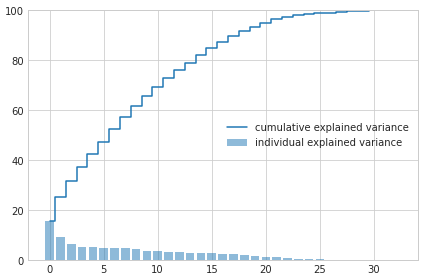

In [18]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(33), percent, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(33), cum_percent, where='mid',
             label='cumulative explained variance')
    plt.ylabel('')
    plt.xlabel('')
    plt.ylim(0,100)
    plt.legend(loc='best')
    plt.tight_layout()
#     plt.savefig("figures/explained variance2.jpg")

The first 20 customers represent the 95% of the data. So we choose to visualize them. 

In [6]:
df = df[df['customer_id']<21]

#  QoE trend over time (month) for each customer.

In [7]:
#adding and empty column of QoE's in order to fill it up later.
empty = np.zeros(len(df['customer_id']))
df['QoE'] = empty

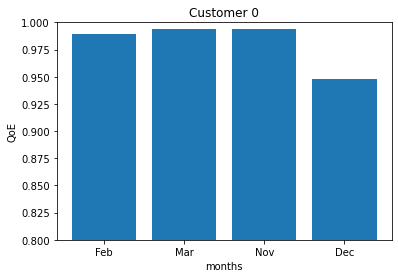

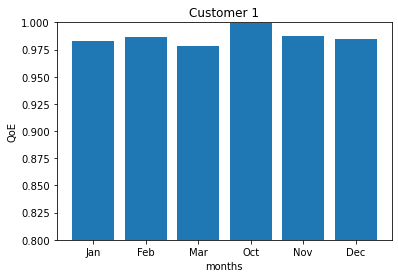

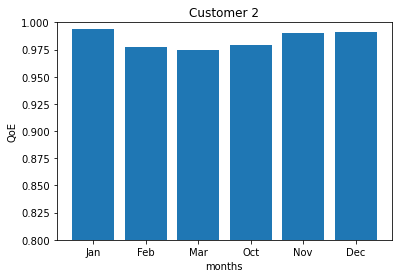

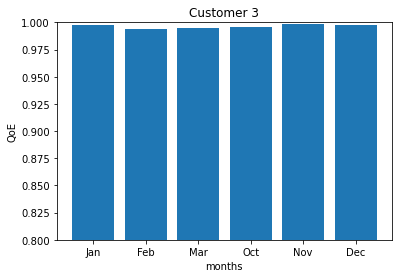

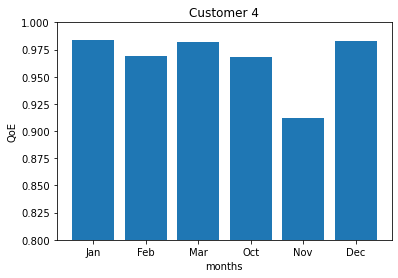

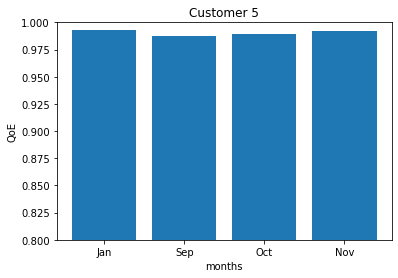

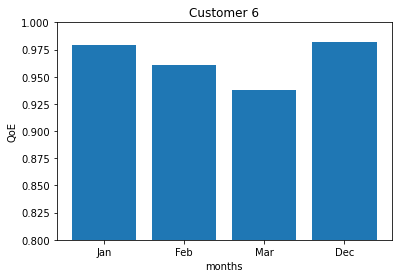

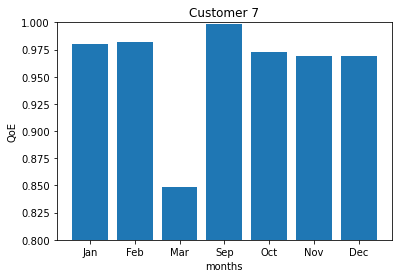

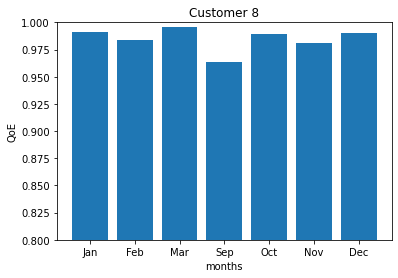

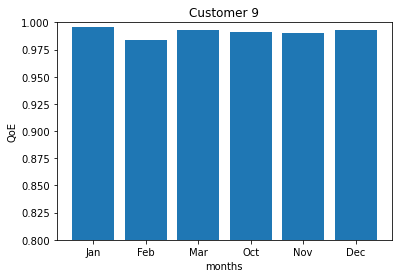

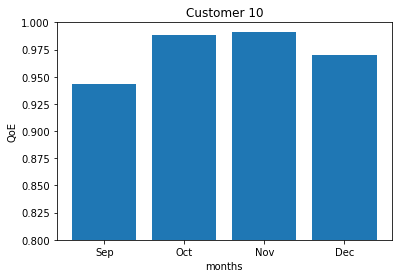

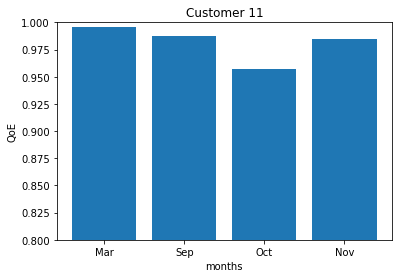

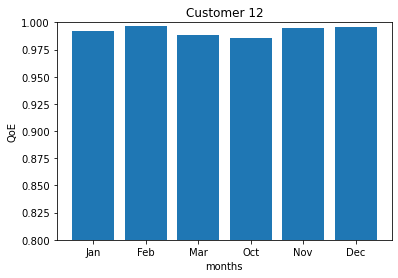

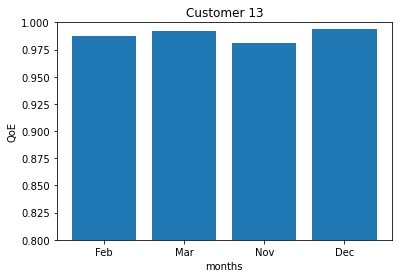

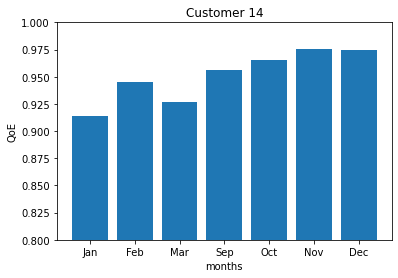

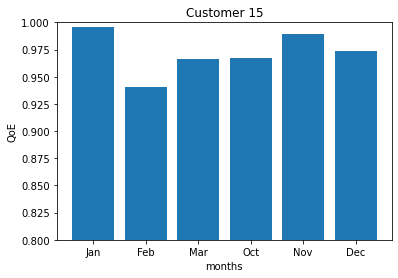

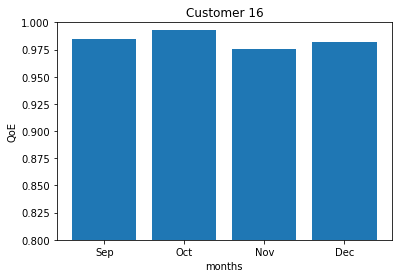

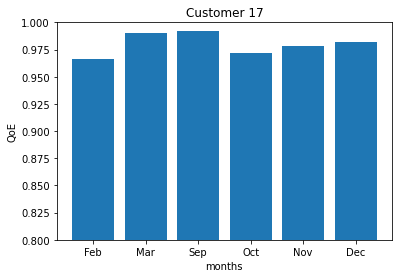

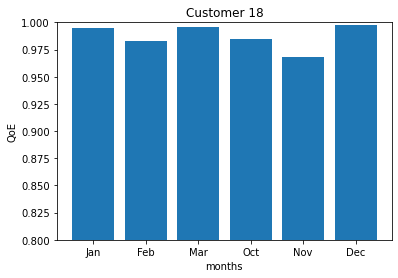

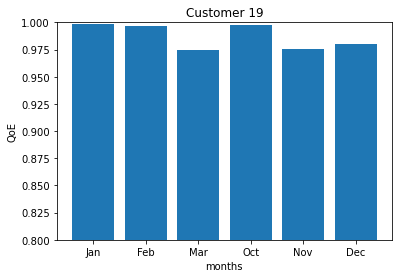

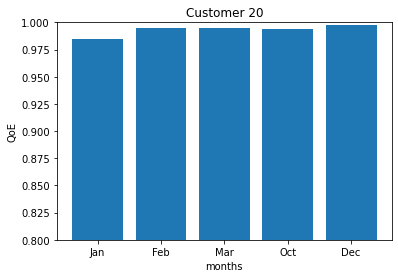

In [8]:
#calculating the QoE of each event and adding it to the dataset. We plot the average QoE of the events of each month for each
#customer.
for customer in range(0,21):
    df_customer = df[df['customer_id'] == customer]
    
    QoE = [[] for _ in range(12)]
    events = df_customer.groupby('event_id')

    for i in events.groups.keys():
        event = df_customer[df_customer['event_id'] == i]   

        datem = (event['day'].min())
        
        argument = datem.month

        T = round((event['timestamp'].max() - event['timestamp'].min())*1.67*10**(-5) + 0.5)
       
        if (T==0):
            months.pop()
            continue;
        
        minutes = []
        minutes = (event['timestamp'] - event['timestamp'].min())*1.67*10**(-5)
        event['minute'] = minutes + 1 #vazw +1 wste to proto lepto na einai to 1 kai oxi to 0. 
                                        #Den exei ousiastikh diafora sto apotelesma
        event = event.astype({'minute':'int'})
        
        QoE[argument-1].append((sum(event.groupby('minute')['qoe'].mean()))/T)
        
        df.loc[df['event_id'] == i, 'QoE'] = ((sum(event.groupby('minute')['qoe'].mean()))/T)
        
        
    average_QoE = []
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    month = []
    for i in range(12):
        if(len(QoE[i])):
            month.append(months[i])
            average_QoE.append(sum(QoE[i])/len(QoE[i]))
    
    plt.title(f"Customer %d" % customer)
    plt.xlabel('months')
    plt.ylabel('QoE')
    
    plt.bar(month, average_QoE)
    plt.ylim(0.8,1)
    #plt.savefig(f"figures/average_qoe%d.jpg" % customer)
    plt.show()

In [22]:
df.head()

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,date,day,month,QoE
0,1632762065906,5.0,107.0,11661.0,2.0,3.0,WFO,0.999976,0.0,785,2021-09-27 17:01:05.906,2021-09-27,0,0.995236
1,1632762104254,5.0,107.0,12810.0,2.0,3.0,WFH,0.281964,0.9,3895,2021-09-27 17:01:44.254,2021-09-27,0,0.995236
2,1632762108299,5.0,107.0,15129.0,19.0,3.0,WFH,1.000000,0.9,0,2021-09-27 17:01:48.299,2021-09-27,0,0.995236
3,1632762112510,5.0,107.0,5860.0,217.0,3.0,WFH,0.999988,0.0,466,2021-09-27 17:01:52.510,2021-09-27,0,0.995236
4,1632762129231,5.0,107.0,4483.0,2.0,3.0,WFO,1.000000,0.0,0,2021-09-27 17:02:09.231,2021-09-27,0,0.995236


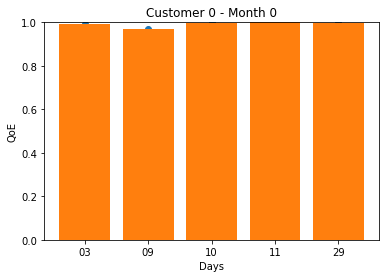

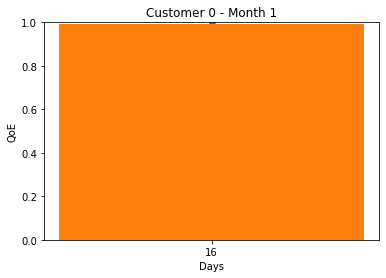

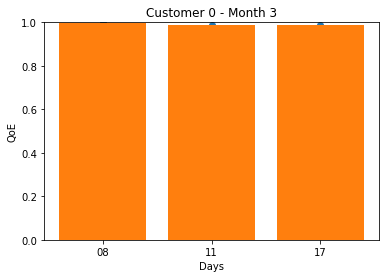

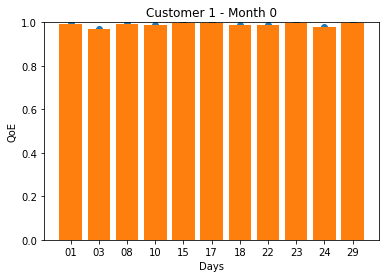

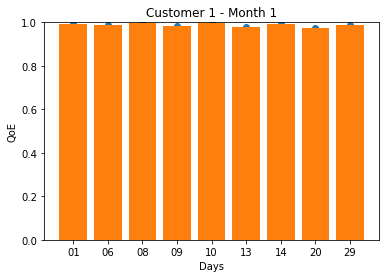

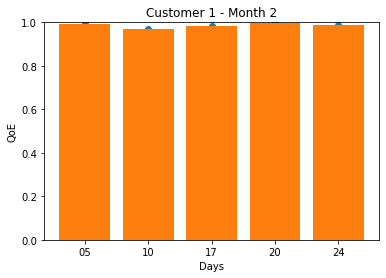

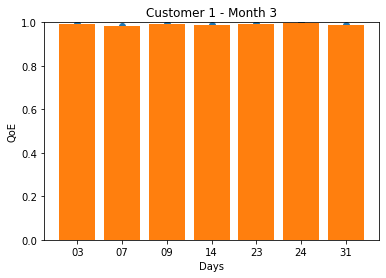

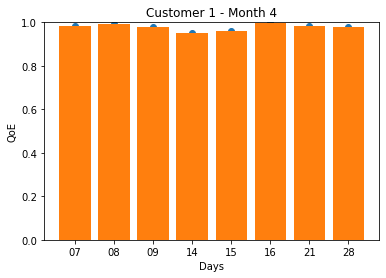

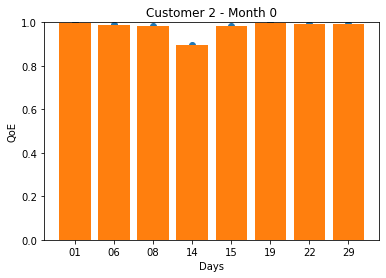

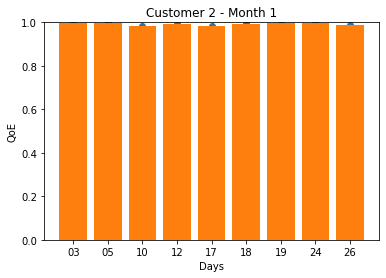

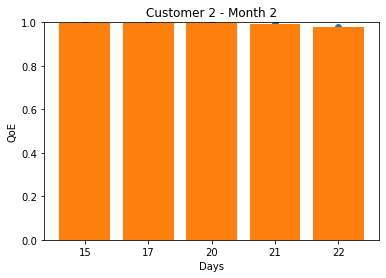

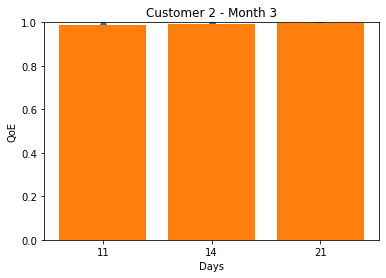

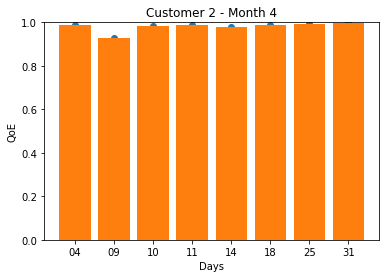

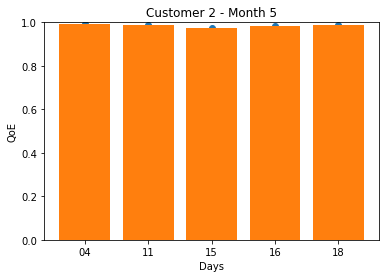

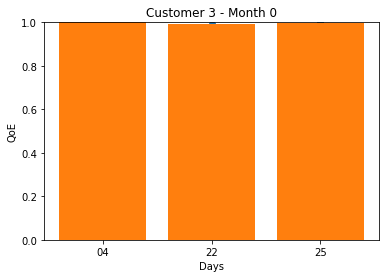

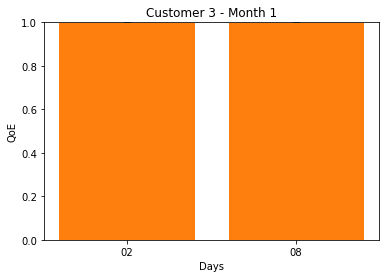

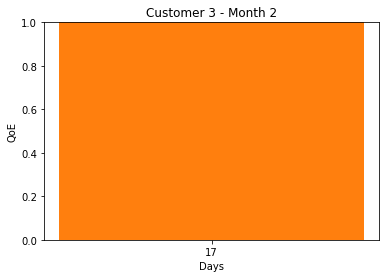

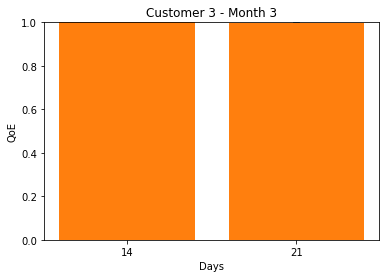

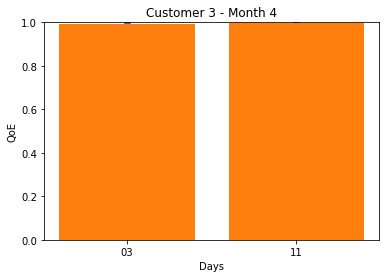

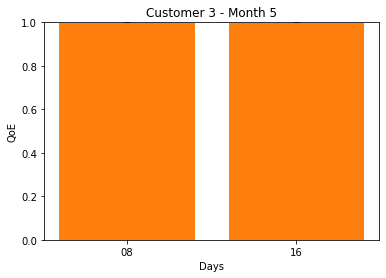

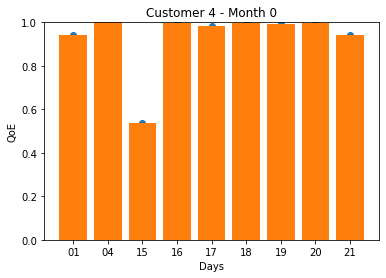

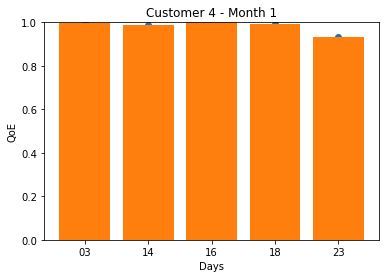

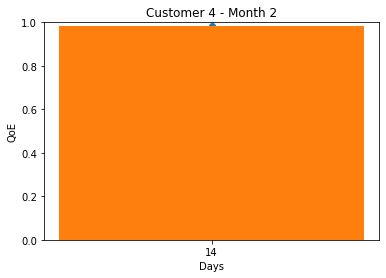

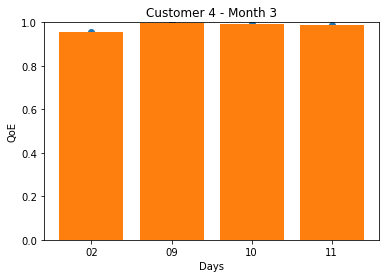

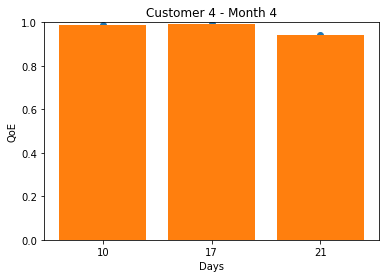

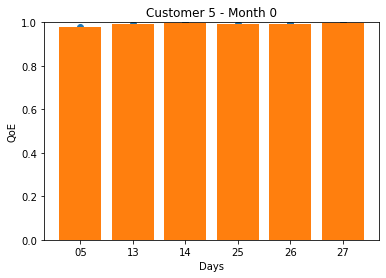

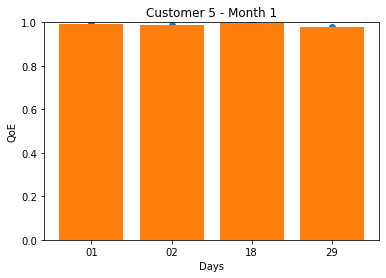

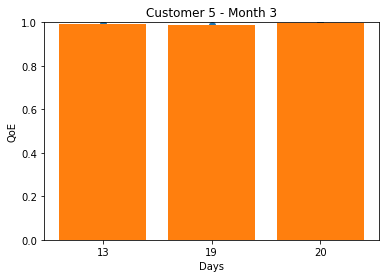

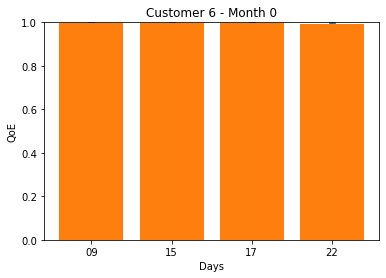

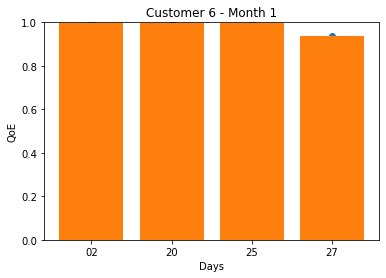

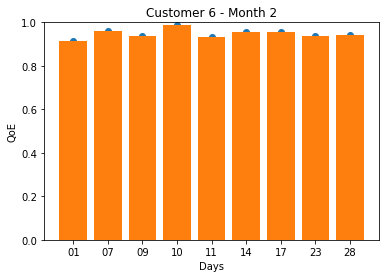

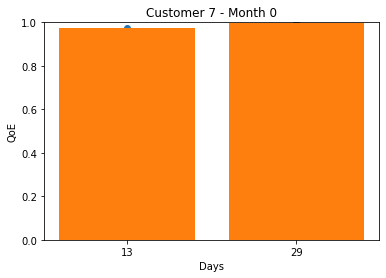

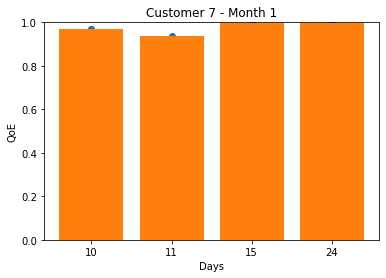

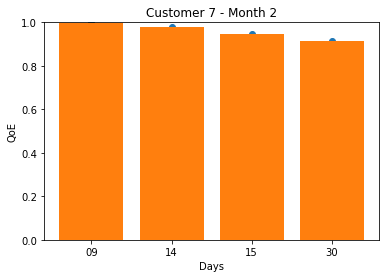

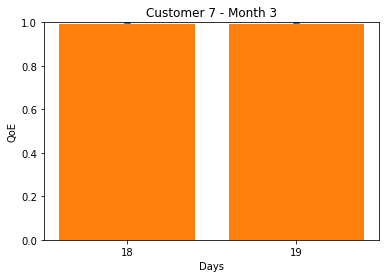

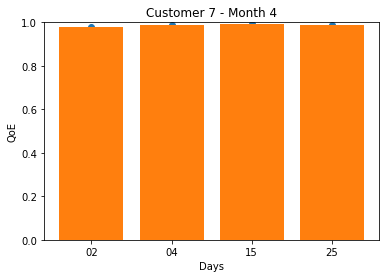

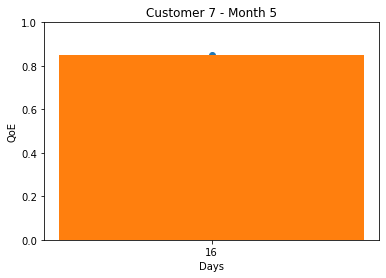

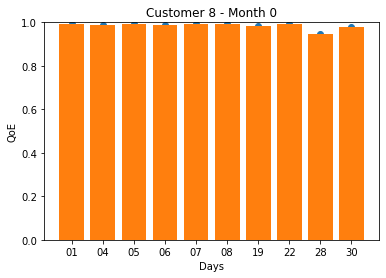

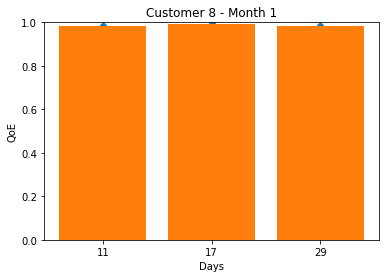

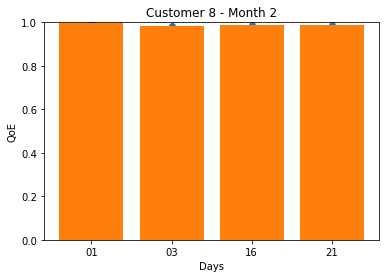

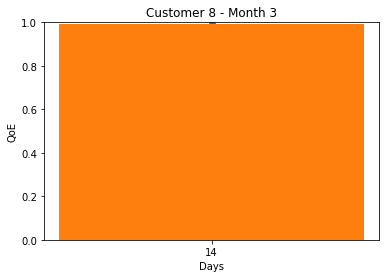

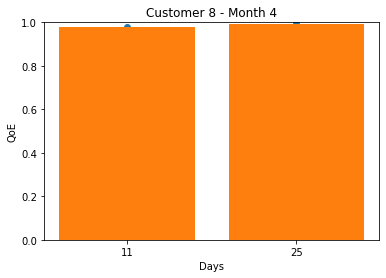

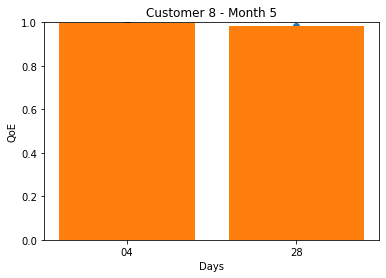

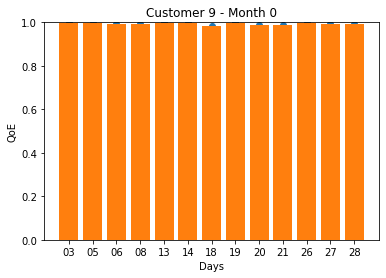

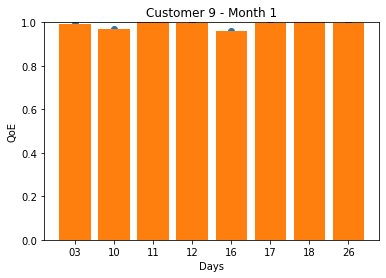

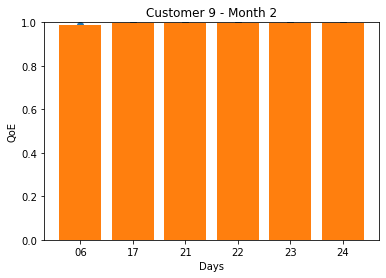

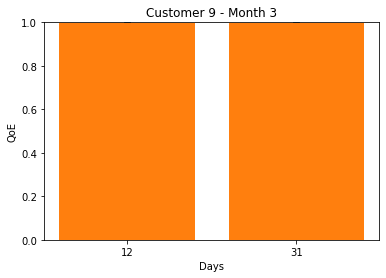

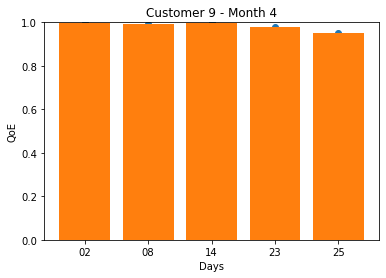

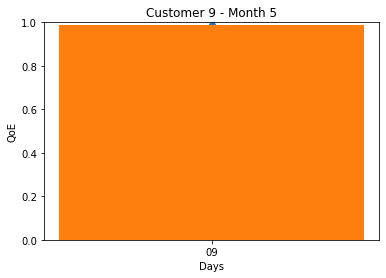

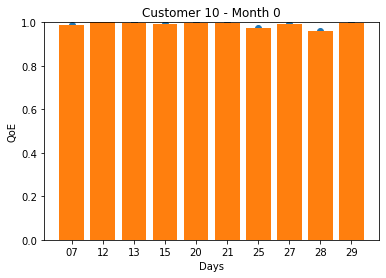

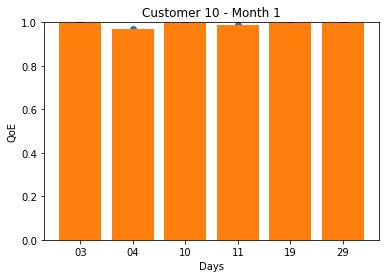

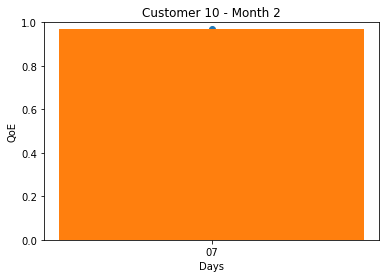

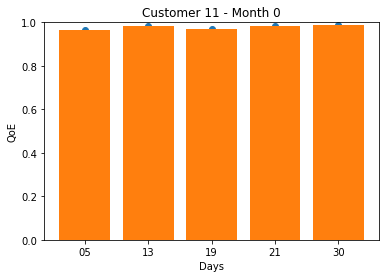

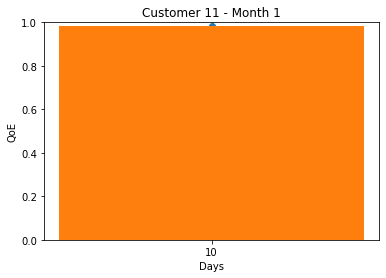

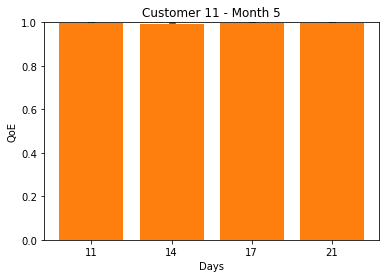

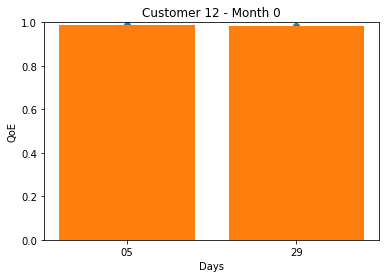

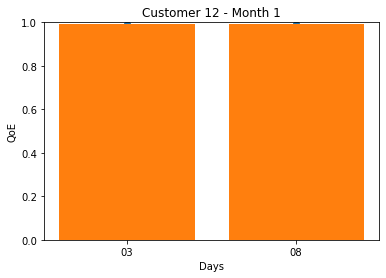

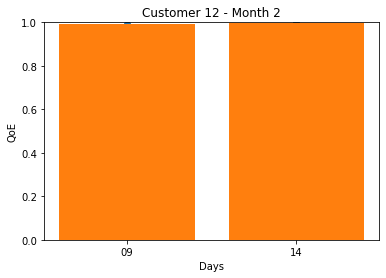

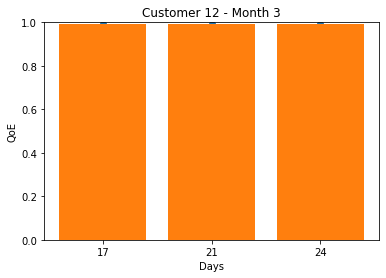

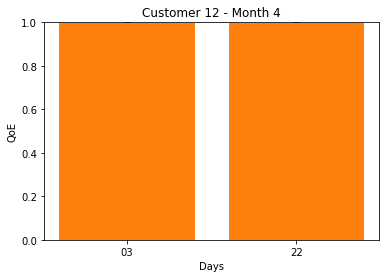

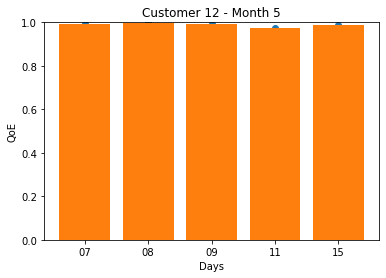

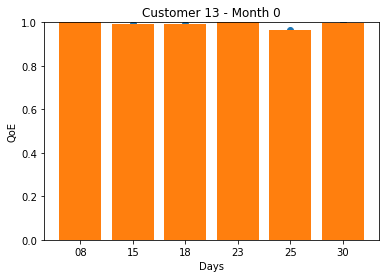

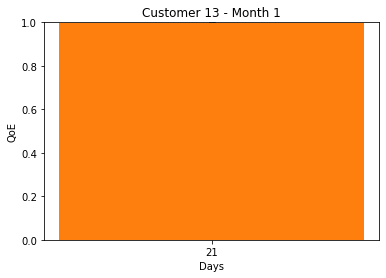

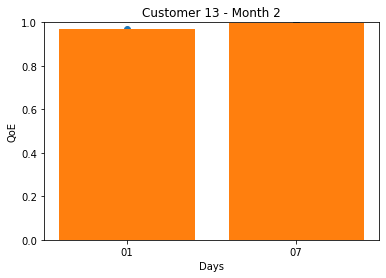

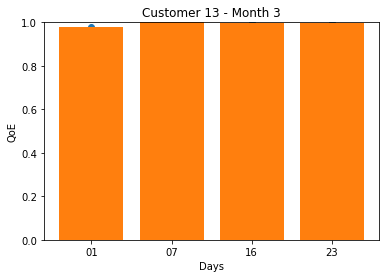

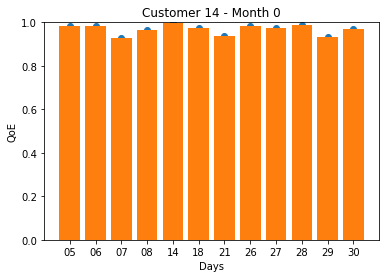

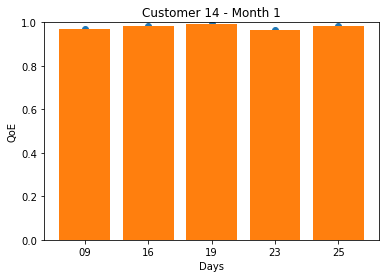

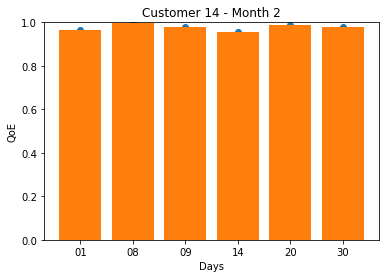

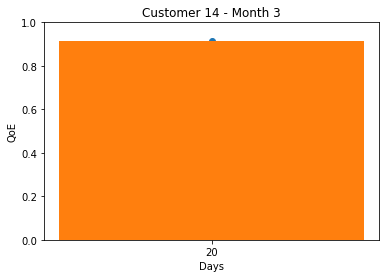

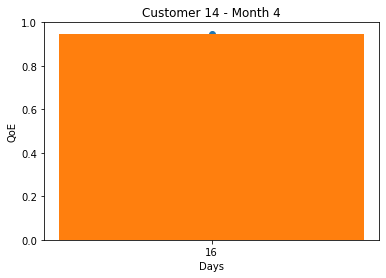

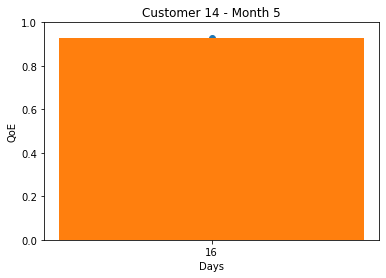

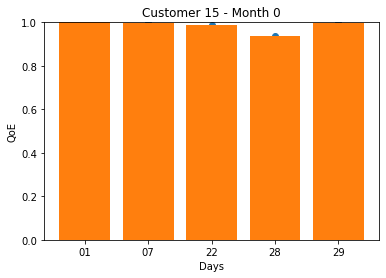

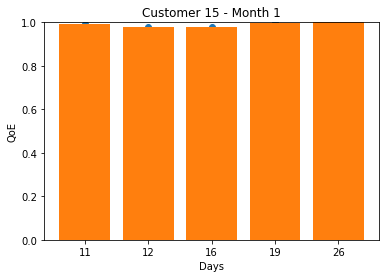

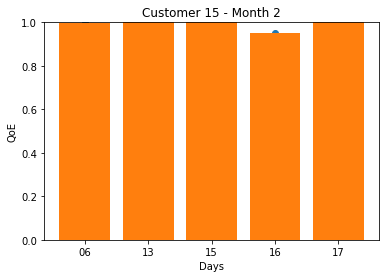

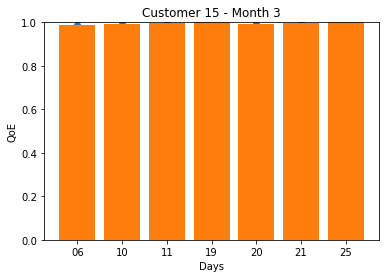

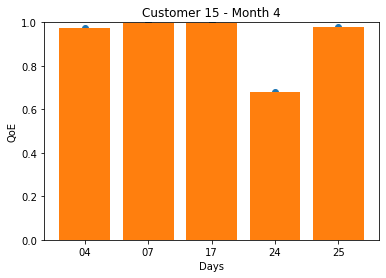

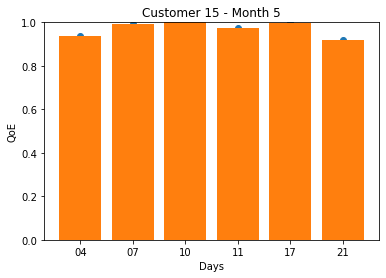

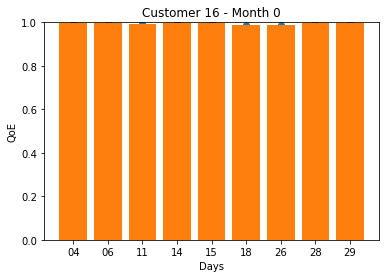

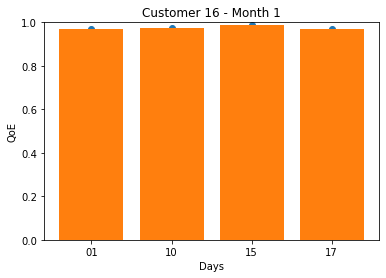

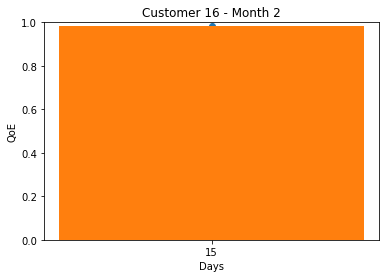

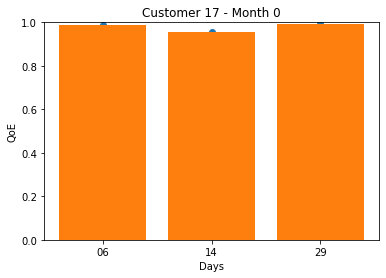

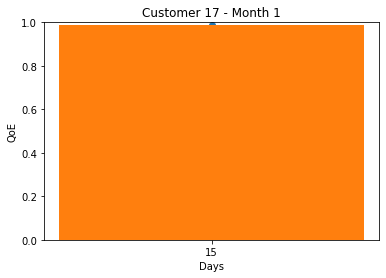

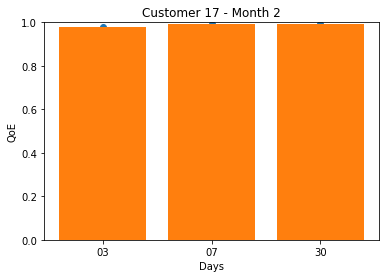

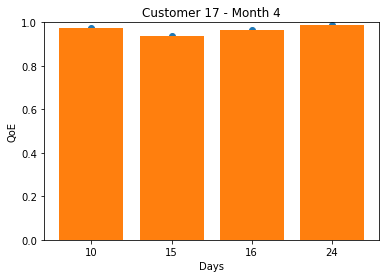

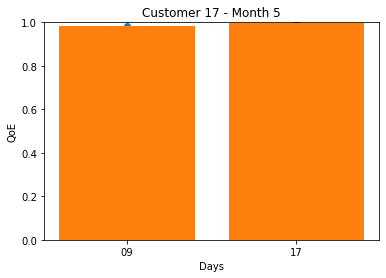

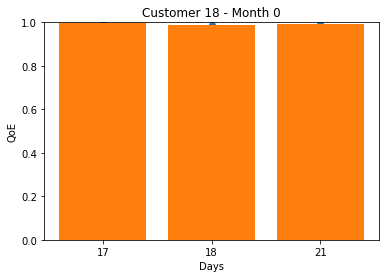

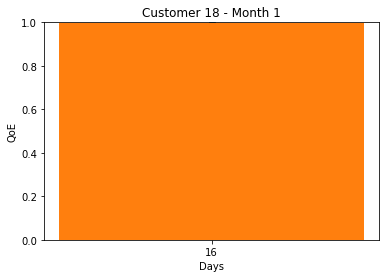

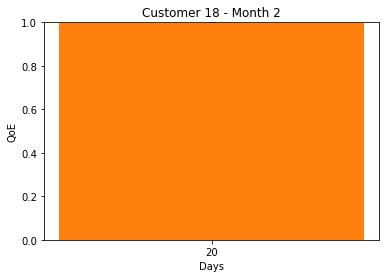

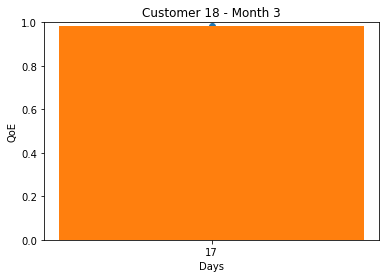

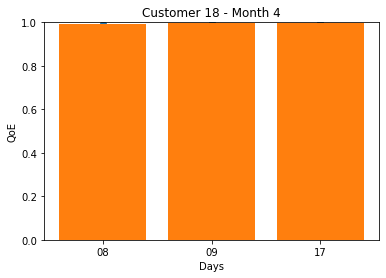

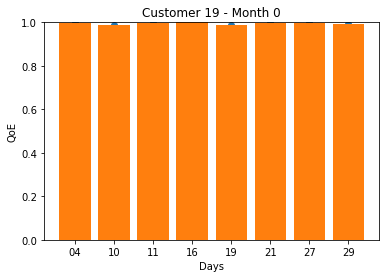

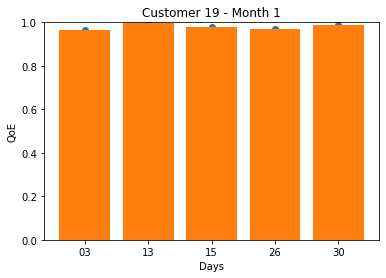

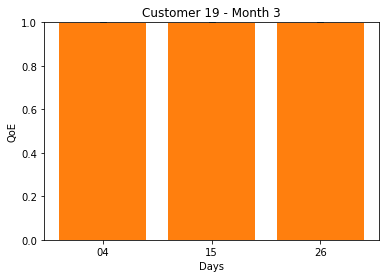

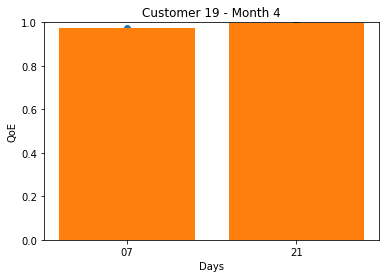

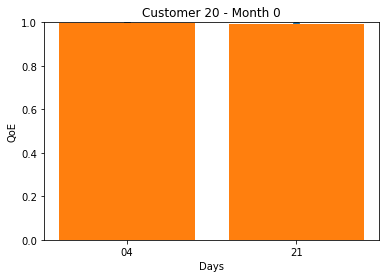

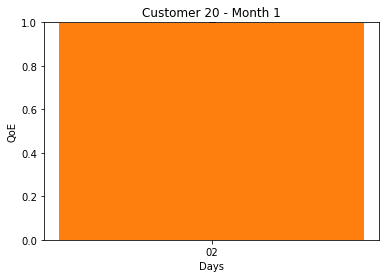

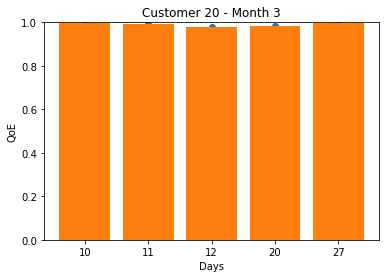

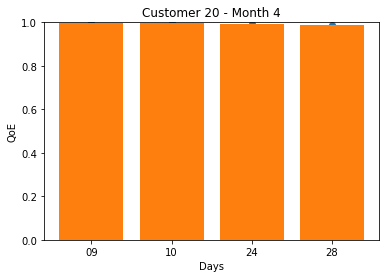

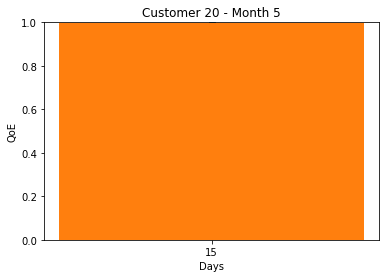

In [21]:
#here we plot the QoE trend for each month for every customer
for i in range(0,21):
    
    df_customer = df[df['customer_id'] == i]
    months = (df_customer['timestamp'] - df_customer['timestamp'].min())*3.8*10**(-10)
    df_customer['month'] = months
    df_customer['month'] = df_customer['month'].astype(int)
    mons = df_customer.groupby('month')
    
    for j in mons.groups.keys():
        
        month = df_customer[df_customer['month'] == j]
            
        events = month.groupby('event_id')
        QoEs = []
        day = []
        for z in events.groups.keys():
            event =  month[month['event_id'] == z]
            QoE = event['QoE'].min()
            QoEs.append(QoE)
            day.append(event['day'].min().strftime("%d"))             
            
            
         
        data_tuples = list(zip(day,QoEs))
        df_day_buffer = pd.DataFrame(data_tuples, columns=['day','QoE'])
        df_day_buffer.sort_values(by='day', ascending=True, inplace=True)
        
        plt.scatter(df_day_buffer['day'],df_day_buffer['QoE'])
        plt.bar(df_day_buffer['day'],df_day_buffer['QoE'])       
                           
        plt.title(f"Customer %d - Month %d" % (i,j))
        plt.xlabel('Days')
        plt.ylabel('QoE')
        plt.ylim(0,1)
        plt.show()

# Buffering severity over time (month) for each customer - Discretize Buffer

In [9]:
# process of discretization of buffer_ms on the total dataset
from sklearn.preprocessing import KBinsDiscretizer
from math import ceil

est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
buffer_np_array = df['buffer_ms']

x = buffer_np_array.to_numpy()

x_reshape = x.reshape((len(x),1))
est.fit(x_reshape)
y = est.transform(x_reshape)
discretize_buffer = y.flatten()
df['discretize_buffer'] = discretize_buffer

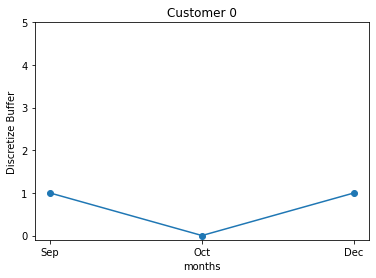

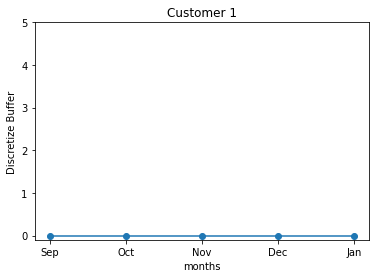

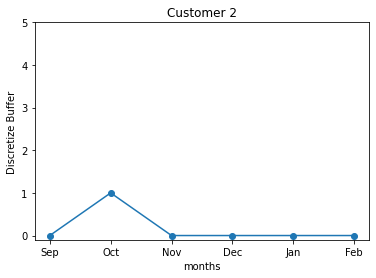

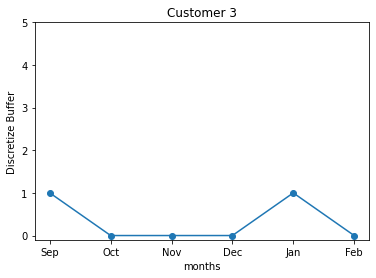

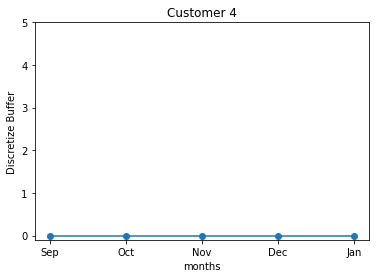

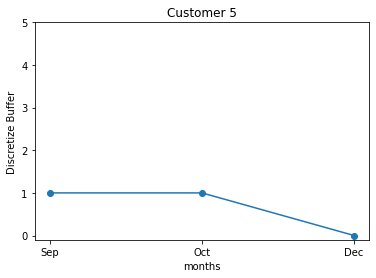

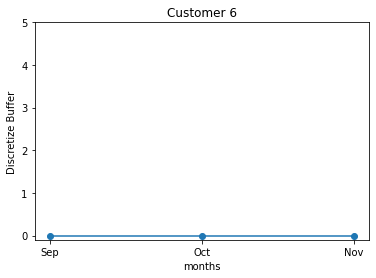

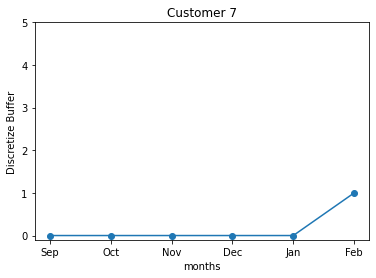

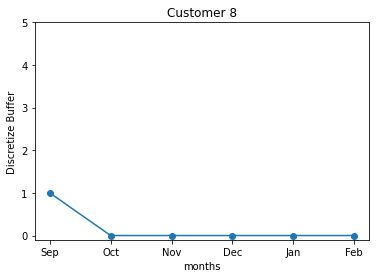

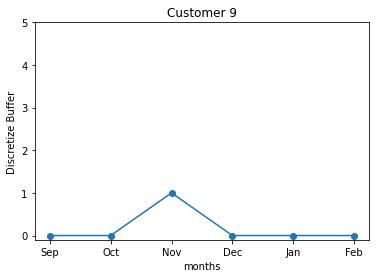

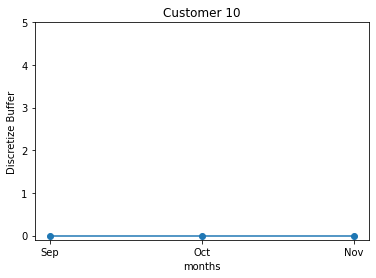

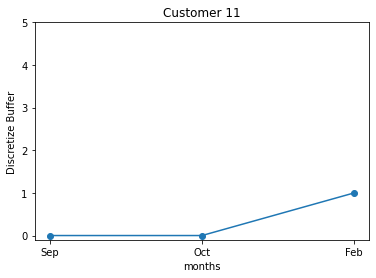

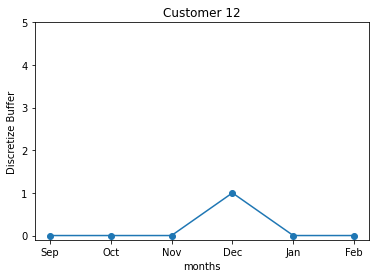

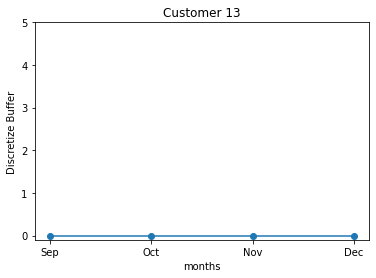

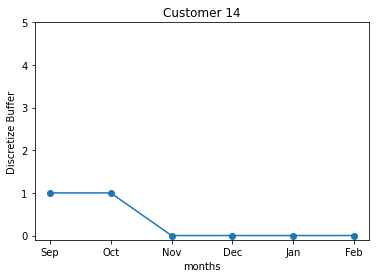

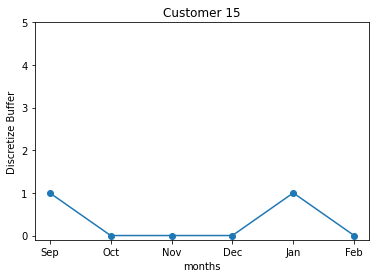

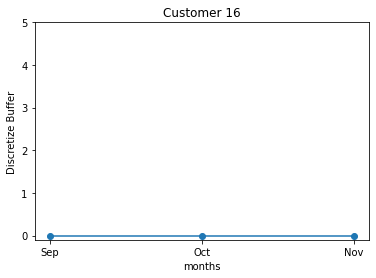

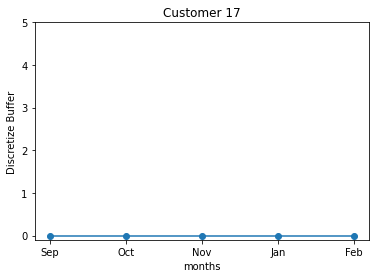

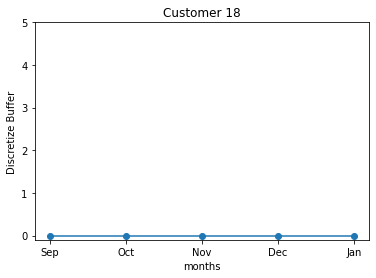

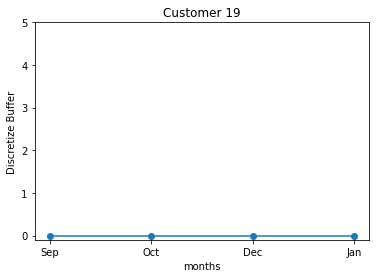

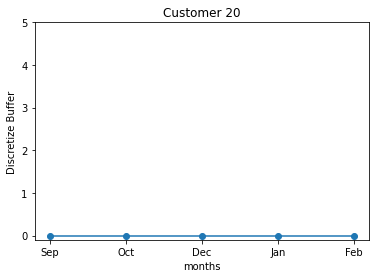

In [24]:
#visualizing the average value of discretize buffers of a month for every customer 
for i in range(0,21):
    
    severity = []
    df_customer = df[df['customer_id'] == i]
    months = (df_customer['timestamp'] - df_customer['timestamp'].min())*3.8*10**(-10) #shifted
    df_customer['month'] = months
    df_customer['month'] = df_customer['month'].astype(int)
    mons = df_customer.groupby('month')
    m = []
    
    months_txt = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar']
    
    for j in mons.groups.keys():
        month = df_customer[df_customer['month'] == j]
        m.append(months_txt[int(month['month'].min())])
        avg_bf = month['discretize_buffer'].mean()
        severity.append(ceil(avg_bf))
        #severity.append(avg_bf)

    plt.scatter(m,severity)
    plt.plot(m,severity)
    plt.ylim(-0.1,5)
    
    plt.title(f"Customer %d" % i)
    plt.xlabel('months')
    plt.ylabel('Discretize Buffer')
    #plt.savefig(f"figures/bullet2/discretize_buffer%d.jpg" % i)
    plt.show()

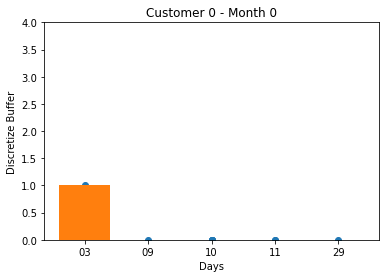

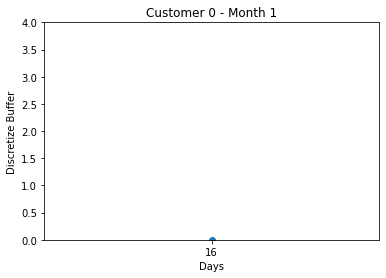

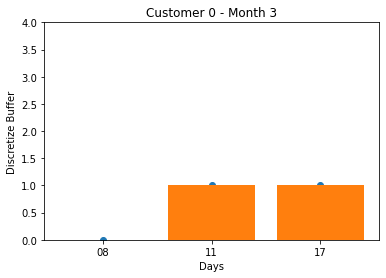

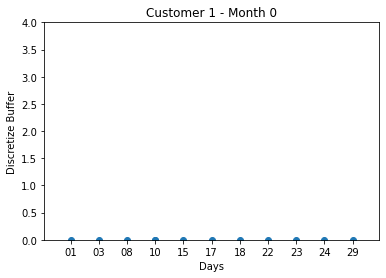

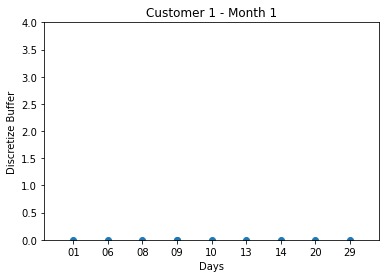

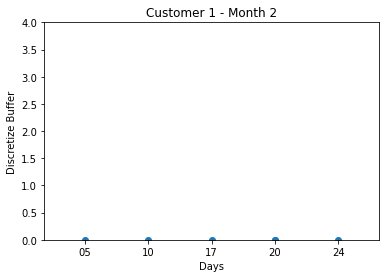

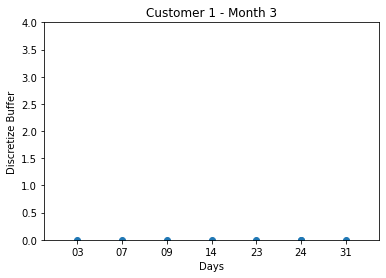

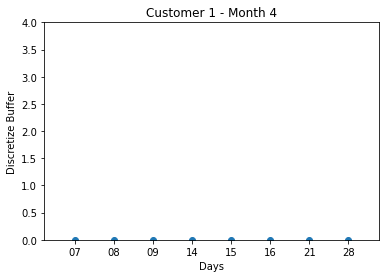

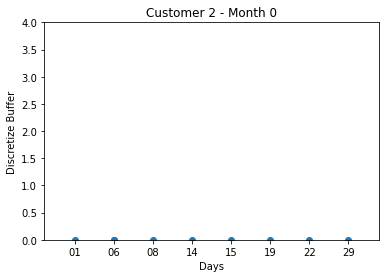

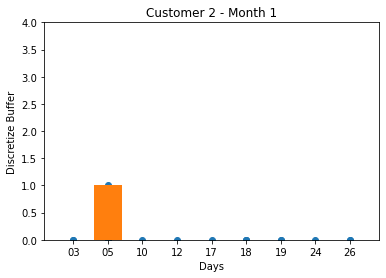

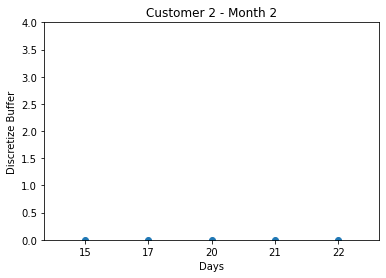

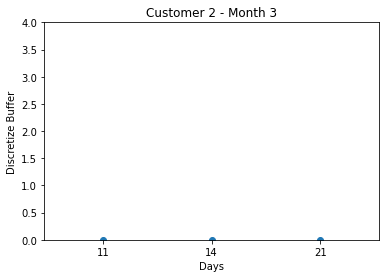

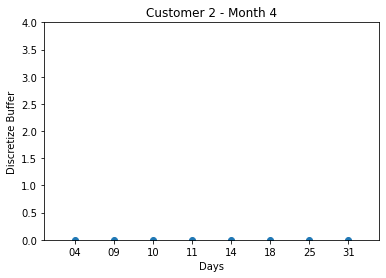

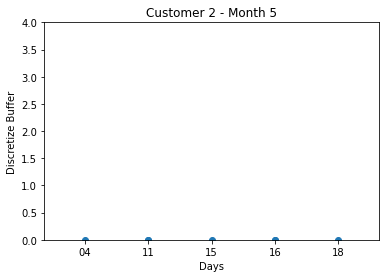

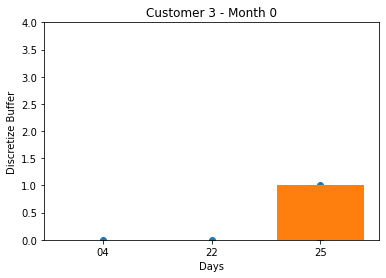

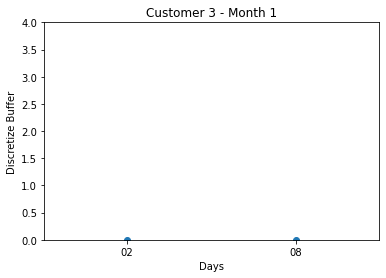

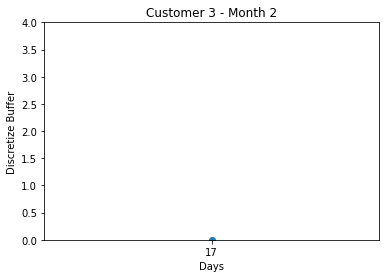

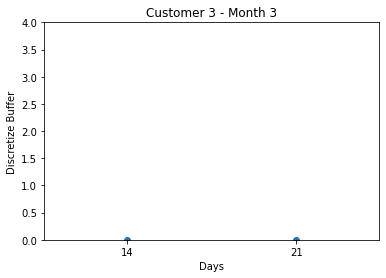

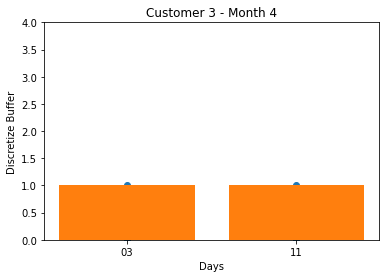

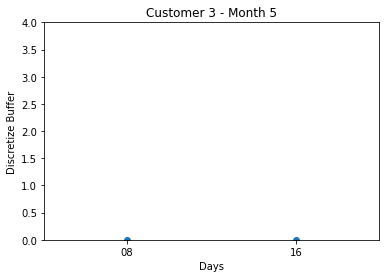

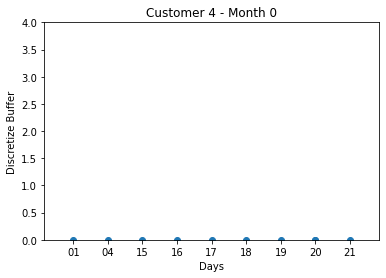

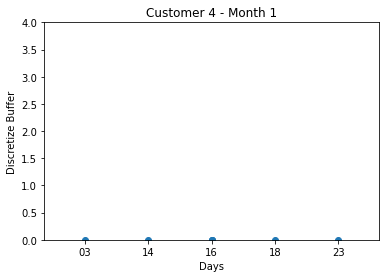

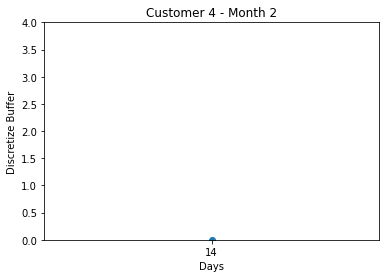

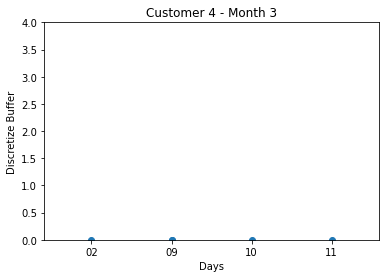

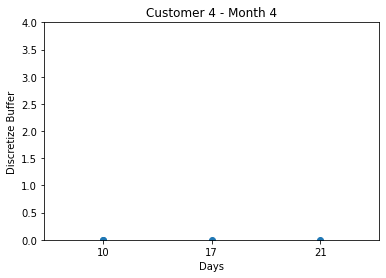

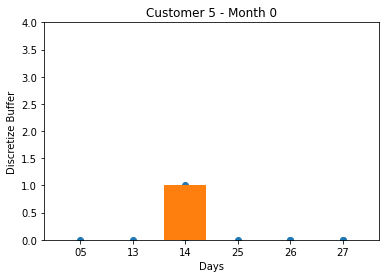

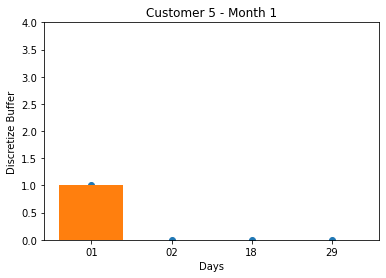

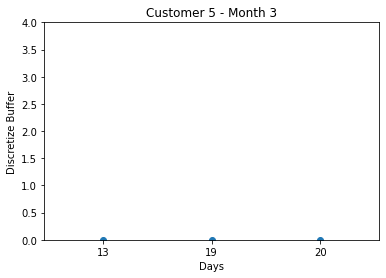

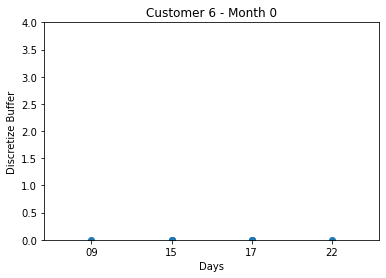

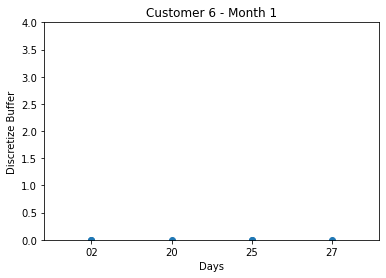

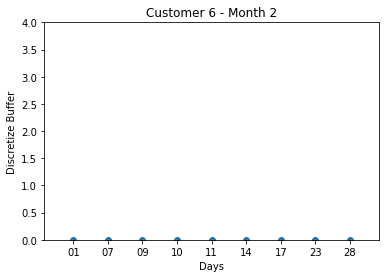

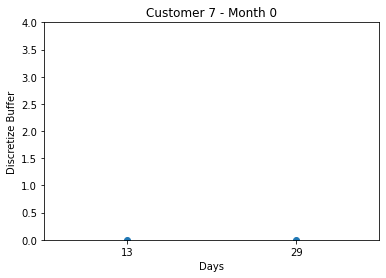

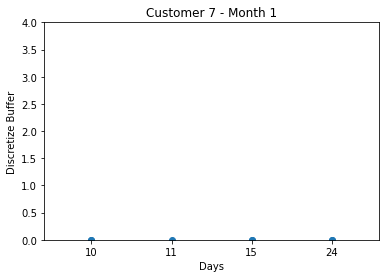

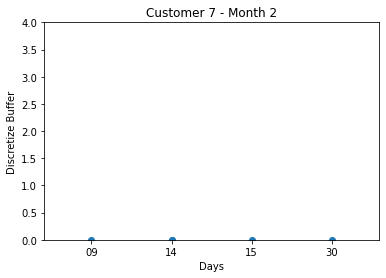

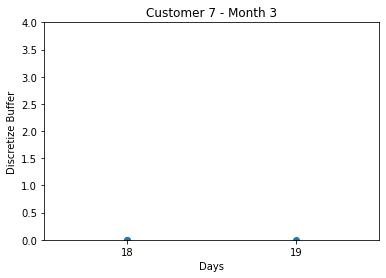

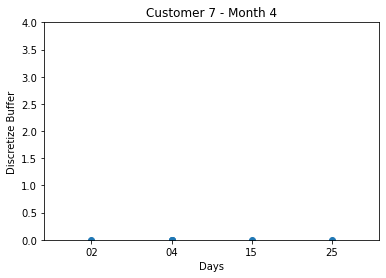

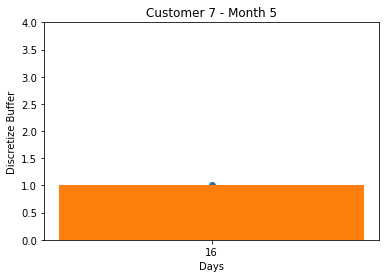

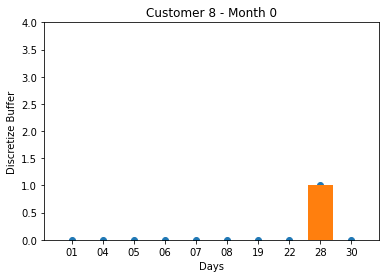

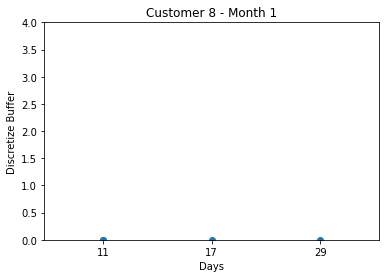

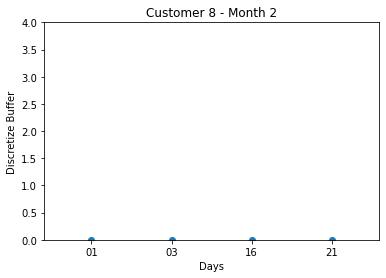

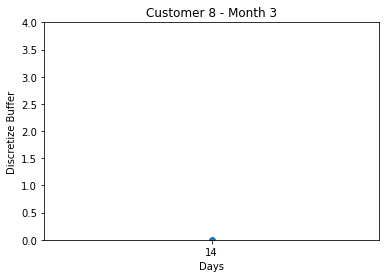

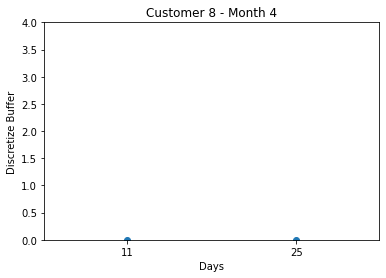

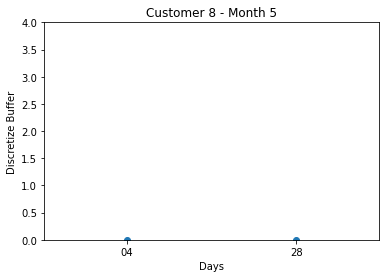

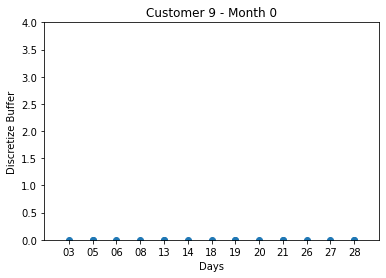

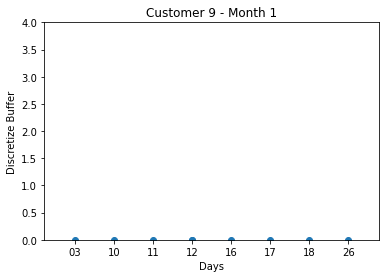

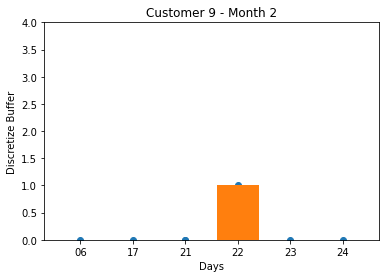

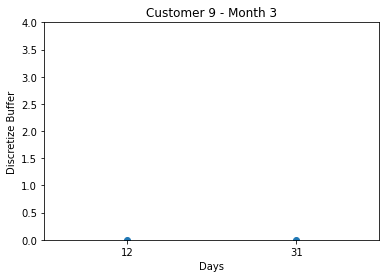

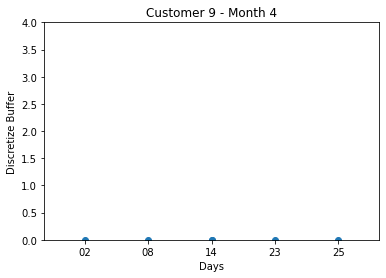

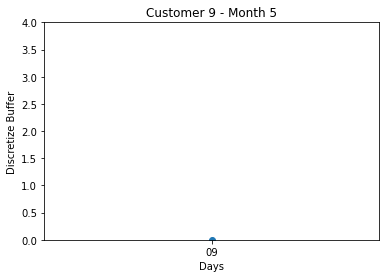

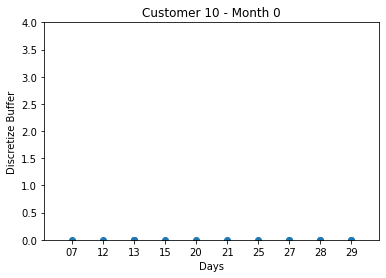

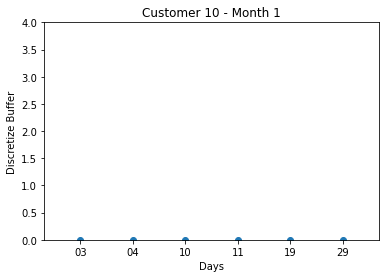

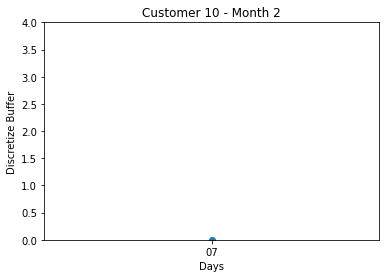

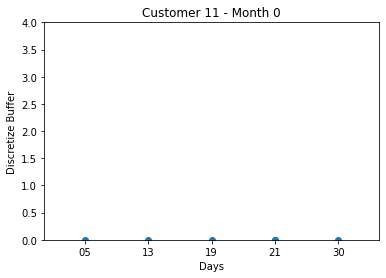

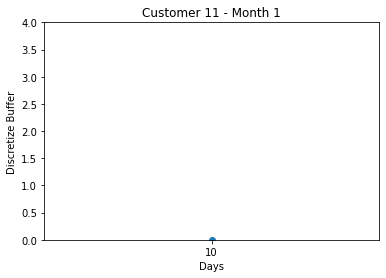

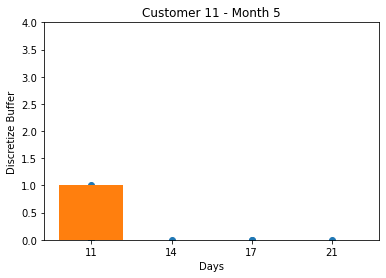

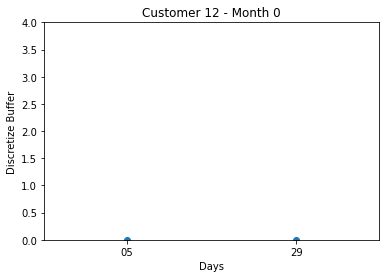

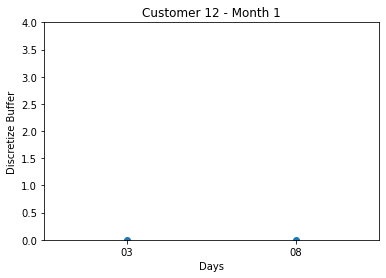

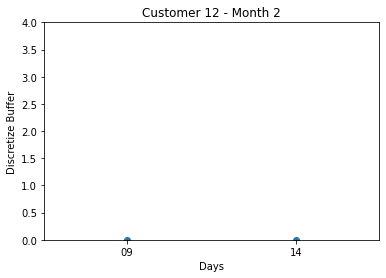

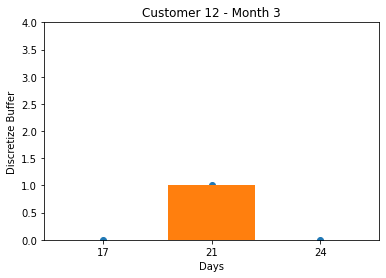

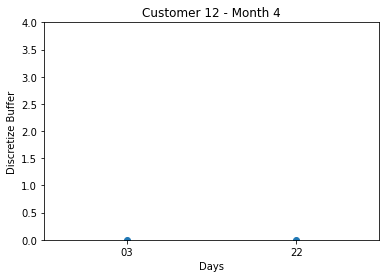

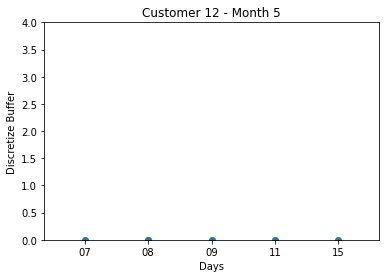

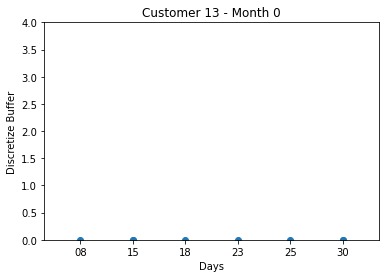

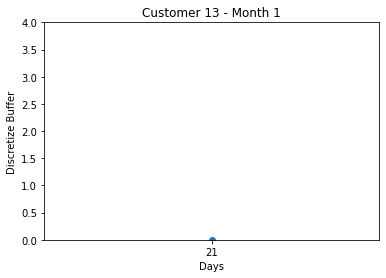

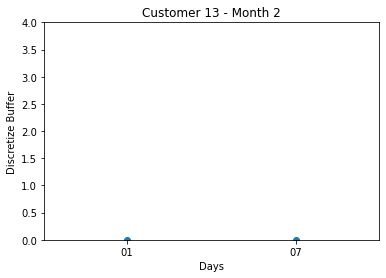

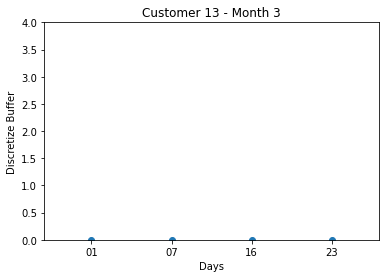

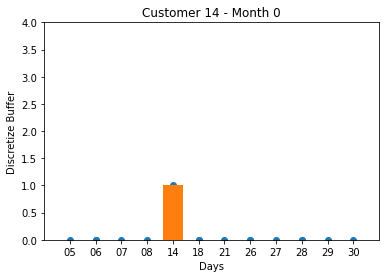

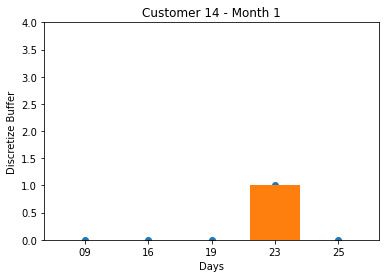

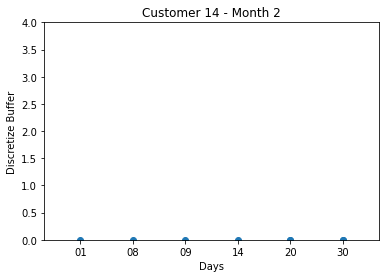

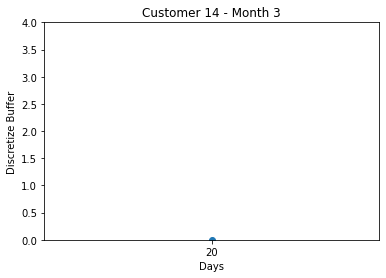

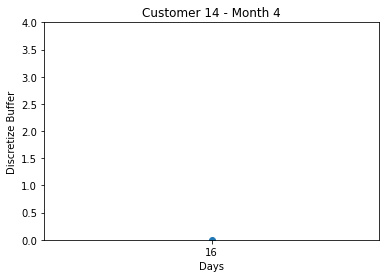

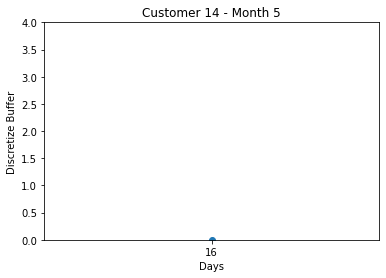

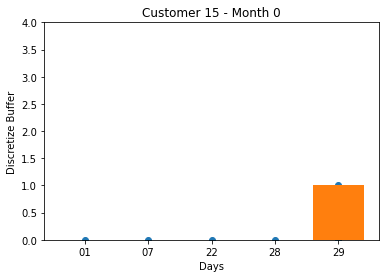

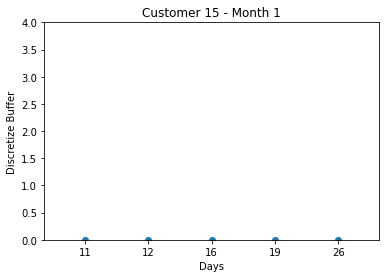

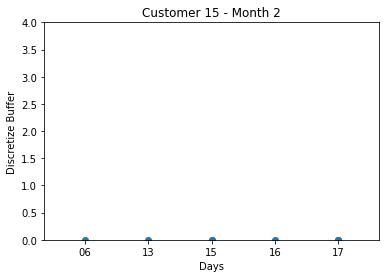

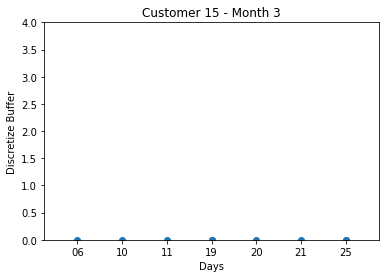

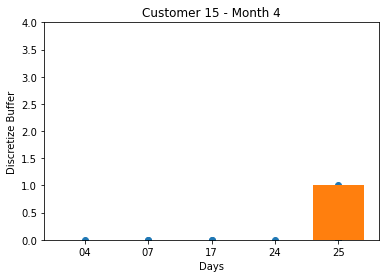

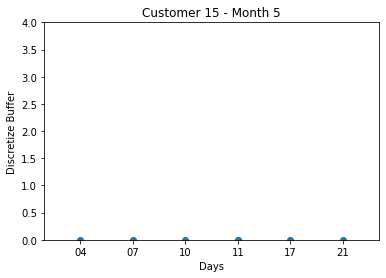

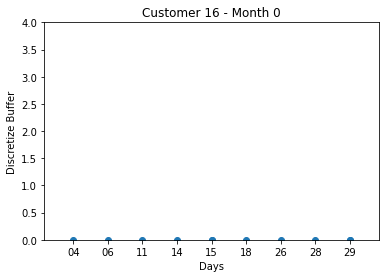

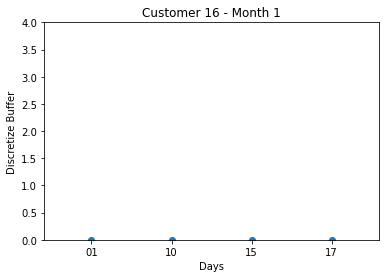

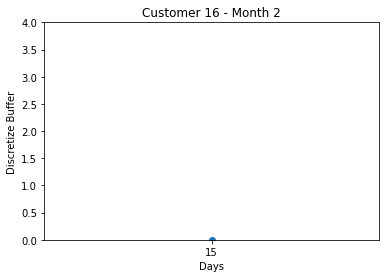

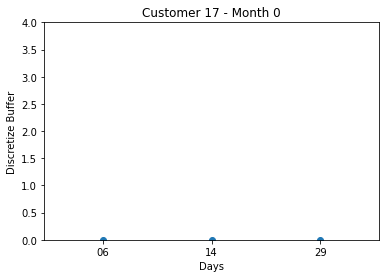

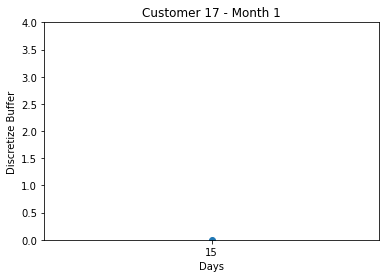

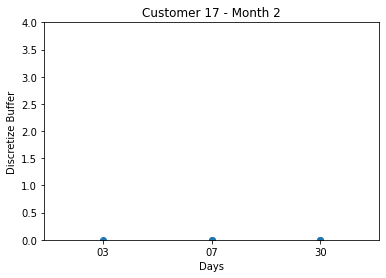

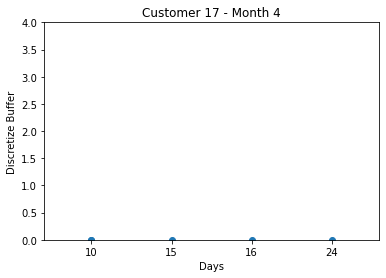

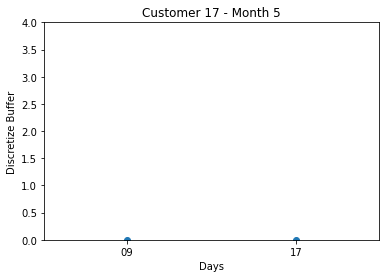

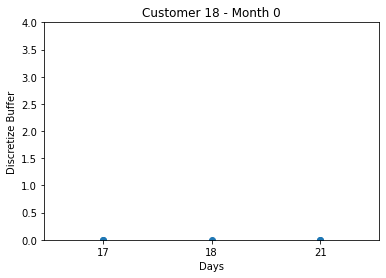

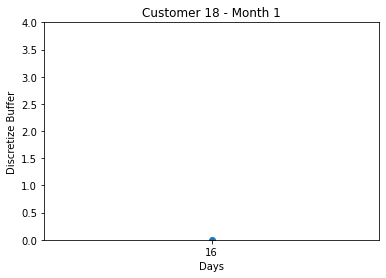

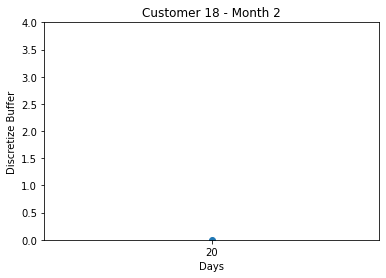

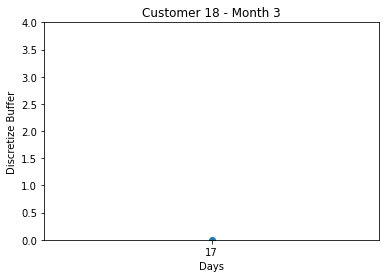

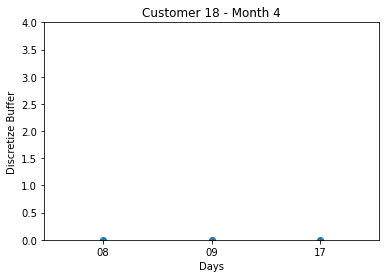

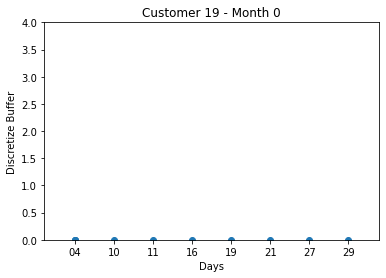

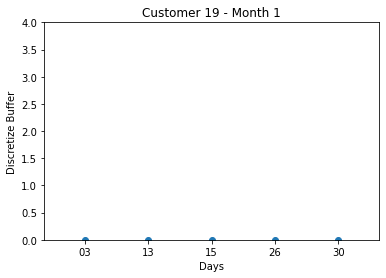

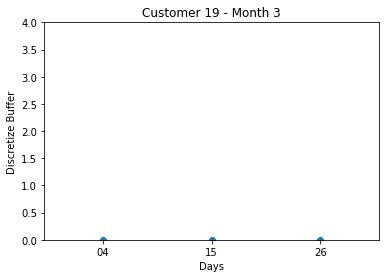

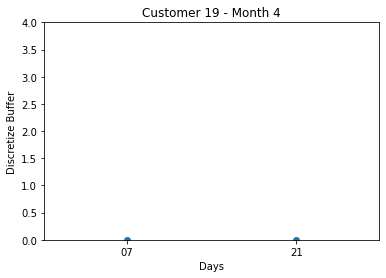

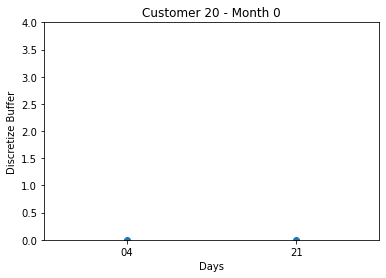

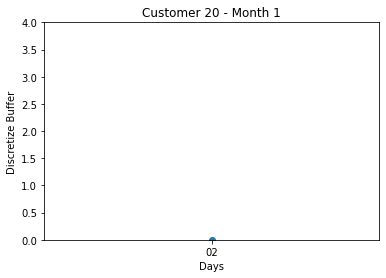

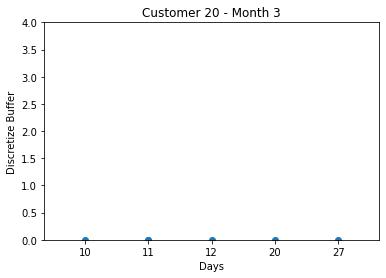

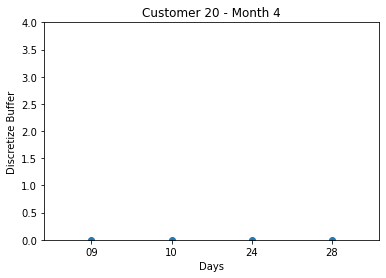

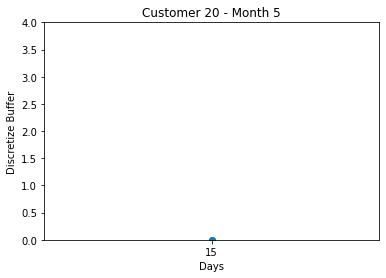

In [25]:
#visualizing the event's average discretize buffer for each month for every customer 
for i in range(0,21):
    
    df_customer = df[df['customer_id'] == i]
    months = (df_customer['timestamp'] - df_customer['timestamp'].min())*3.8*10**(-10)
    df_customer['month'] = months
    df_customer['month'] = df_customer['month'].astype(int)
    mons = df_customer.groupby('month')
    
    for j in mons.groups.keys():
        
        month = df_customer[df_customer['month'] == j]
            
        events = month.groupby('event_id')
        severity = []
        day = []
        for z in events.groups.keys():
            event =  month[month['event_id'] == z]
            avg_bf = event['discretize_buffer'].mean()
            severity.append(ceil(avg_bf))
            day.append(event['day'].min().strftime("%d"))             
            
            
        data_tuples = list(zip(day,severity))
        df_day_buffer = pd.DataFrame(data_tuples, columns=['day','buffer'])
        df_day_buffer.sort_values(by='day', ascending=True, inplace=True)
        
        plt.scatter(df_day_buffer['day'],df_day_buffer['buffer'])
        plt.bar(df_day_buffer['day'],df_day_buffer['buffer'])       
                           
        plt.title(f"Customer %d - Month %d" % (i,j))
        plt.xlabel('Days')
        plt.ylabel('Discretize Buffer')
        plt.ylim(0,4)
        plt.show()

# Number of viewers over time that experience the QoE level - Discetize QoE

In [15]:
# process of QoE discretization on the whole dataset
from sklearn.preprocessing import KBinsDiscretizer
from math import ceil
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

QoE_np_array = df['QoE']
x = QoE_np_array.to_numpy()

x_reshape = x.reshape((len(x),1))
est.fit(x_reshape)
y = est.transform(x_reshape)
discretize_QoE = y.flatten()
df['discretize_QoE'] = discretize_QoE

In [27]:
df.head()

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,date,day,month,QoE,discretize_buffer,discretize_QoE
0,1632762065906,5.0,107.0,11661.0,2.0,3.0,WFO,0.999976,0.0,785,2021-09-27 17:01:05.906,2021-09-27,0,0.995236,0.0,4.0
1,1632762104254,5.0,107.0,12810.0,2.0,3.0,WFH,0.281964,0.9,3895,2021-09-27 17:01:44.254,2021-09-27,0,0.995236,0.0,4.0
2,1632762108299,5.0,107.0,15129.0,19.0,3.0,WFH,1.000000,0.9,0,2021-09-27 17:01:48.299,2021-09-27,0,0.995236,0.0,4.0
3,1632762112510,5.0,107.0,5860.0,217.0,3.0,WFH,0.999988,0.0,466,2021-09-27 17:01:52.510,2021-09-27,0,0.995236,0.0,4.0
4,1632762129231,5.0,107.0,4483.0,2.0,3.0,WFO,1.000000,0.0,0,2021-09-27 17:02:09.231,2021-09-27,0,0.995236,0.0,4.0


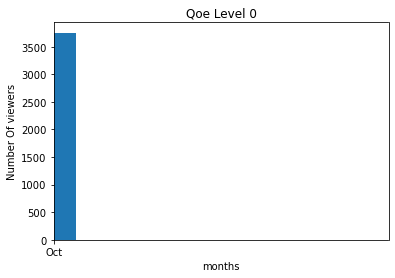

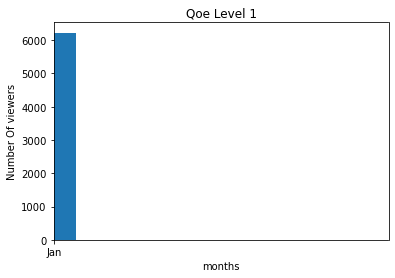

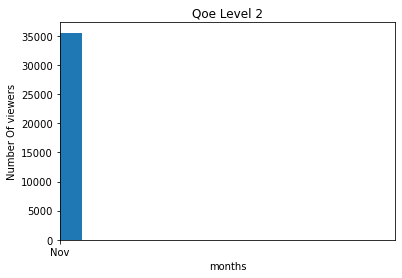

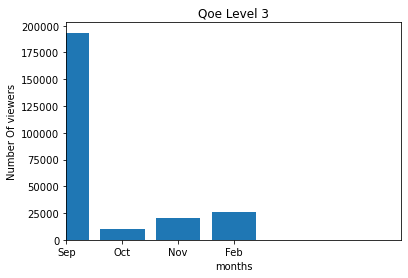

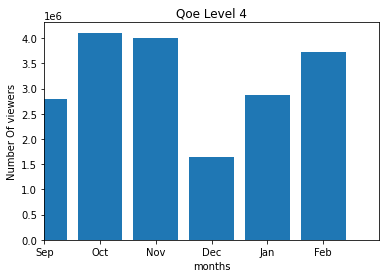

In [28]:
# visualizing the number of viewers that experience each QoE level every month
for qoe_level in range(0,5):
    viewers_per_month = []
    df_QoE = df[df['discretize_QoE'] == qoe_level]
    
    months = df_QoE.groupby(['month'])
    viewers_each_month = df_QoE.groupby(['month']).count()
        
    for month in range(0,viewers_each_month.shape[0]):
        viewers_per_month.append(viewers_each_month.iloc[month][0])
    
    months_txt = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar']
    m = []
    for i in months.groups.keys():
        m.append(months_txt[i])
    plt.bar(m, viewers_per_month)
    plt.xlim(0,6)
    plt.title(f"Qoe Level %d" % qoe_level)
    plt.xlabel('months')
    plt.ylabel('Number Of viewers')
   # plt.savefig(f"figures/bullet3/qoe_level%d.jpg" % qoe_level)
    plt.show()


# QoE trend over time for each customer and the viewers’ location type.

In [29]:
df_wfo = df[df['viewer_type'] == 'WFO']

In [30]:
df_wfh = df[df['viewer_type'] == 'WFH']

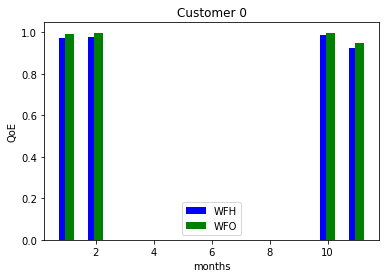

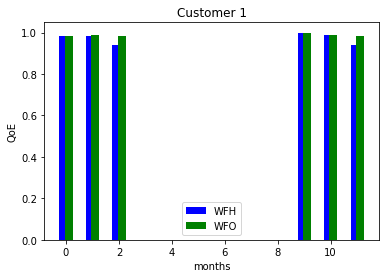

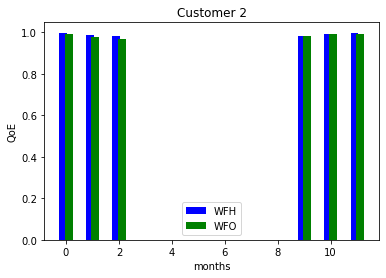

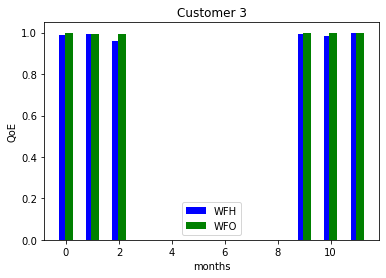

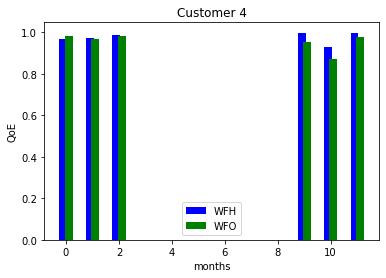

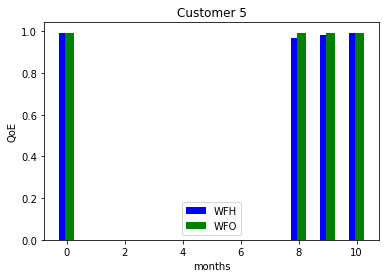

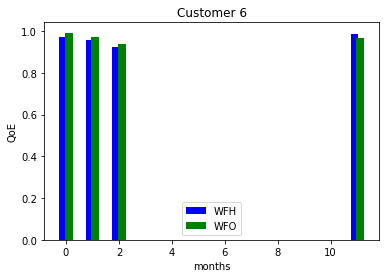

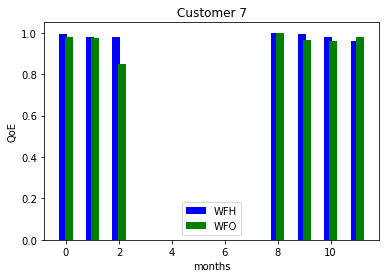

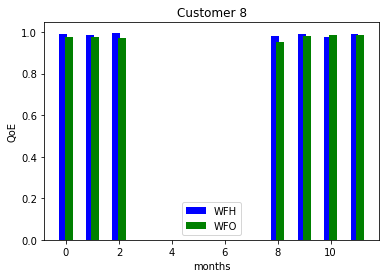

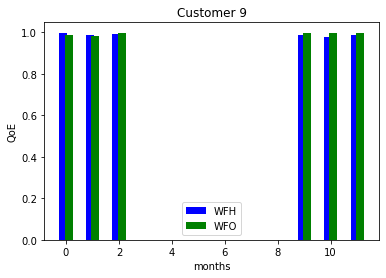

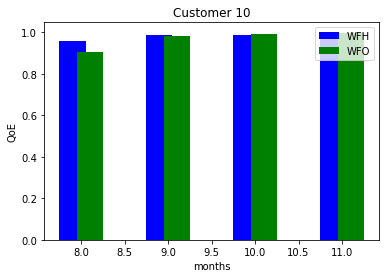

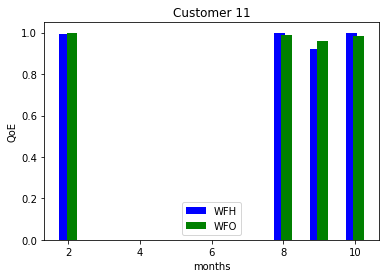

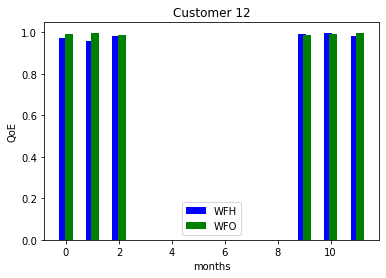

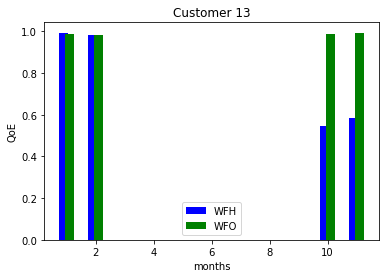

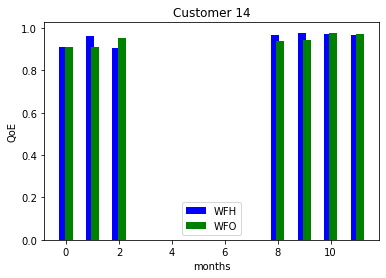

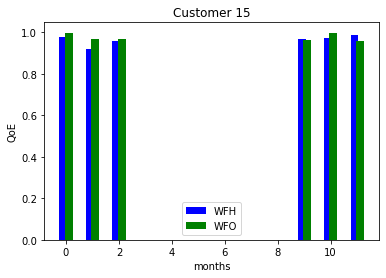

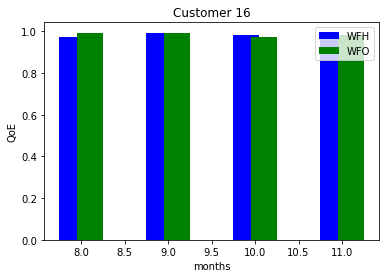

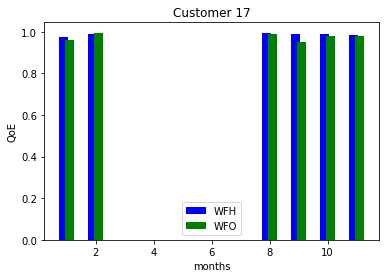

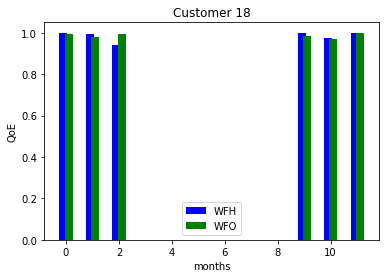

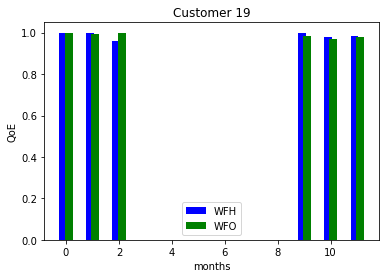

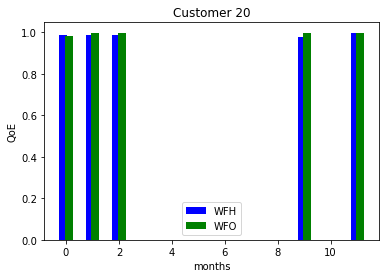

In [31]:
#visualizing the average QoE of the events each customer type has every month, for every customer.
for customer in range(0,21):
    df_customer = df_wfo[df_wfo['customer_id'] == customer]
    
    QoE = [[] for _ in range(12)]
    events = df_customer.groupby('event_id')
    
    for i in events.groups.keys():
        event = df_customer[df_customer['event_id'] == i]   

        #datem = datetime.strptime(event['date'].min(), "%Y-%m-%d %H:%M:%S")
        datem = event['day'].min()
                                  
        argument = datem.month
        T = round((event['timestamp'].max() - event['timestamp'].min())*1.67*10**(-5) + 0.5)
        if (T==0):
            continue;
        
        minutes = []
        minutes = (event['timestamp'] - event['timestamp'].min())*1.67*10**(-5)
        event['minute'] = minutes + 1 #vazw +1 wste to proto lepto na einai to 1 kai oxi to 0. 
                                        #Den exei ousiastikh diafora sto apotelesma
        event = event.astype({'minute':'int'})
        
        QoE[argument-1].append((sum(event.groupby('minute')['qoe'].mean()))/T)

        df.loc[df['event_id'] == i, 'QoE'] = ((sum(event.groupby('minute')['qoe'].mean()))/T)
        
        
    average_QoE_wfo = []
    months_wfo = []
    for i in range(0,12):
        if(len(QoE[i])):
            months_wfo.append(i)
            average_QoE_wfo.append(sum(QoE[i])/len(QoE[i]))
    
    
    df_customer = df_wfh[df_wfh['customer_id'] == customer]
    
    QoE = [[] for _ in range(12)]
    events = df_customer.groupby('event_id')
    for i in events.groups.keys():
        event = df_customer[df_customer['event_id'] == i]   

        #datem = datetime.strptime(event['date'].min(), "%Y-%m-%d %H:%M:%S")
        datem = event['day'].min()
        
        argument = datem.month
        T = round((event['timestamp'].max() - event['timestamp'].min())*1.67*10**(-5) + 0.5)
        if (T==0):
            continue;
        
        minutes = []
        minutes = (event['timestamp'] - event['timestamp'].min())*1.67*10**(-5)
        event['minute'] = minutes + 1 #vazw +1 wste to proto lepto na einai to 1 kai oxi to 0. 
                                        #Den exei ousiastikh diafora sto apotelesma
        event = event.astype({'minute':'int'})
        
        QoE[argument-1].append((sum(event.groupby('minute')['qoe'].mean()))/T)
        
        df.loc[df['event_id'] == i, 'QoE'] = ((sum(event.groupby('minute')['qoe'].mean()))/T)
        
        
    average_QoE_wfh = []
    months_wfh = []
    for i in range(12):
        if(len(QoE[i])):
            months_wfh.append(i)
            average_QoE_wfh.append(sum(QoE[i])/len(QoE[i]))
    
    plt.figure()
    ax = plt.subplot(111)
    w=0.3
    wfh = np.array(months_wfh)
    wfo = np.array(months_wfo)
    ax.bar(wfh-0.1,average_QoE_wfh,  width=w, color='b', align='center', label = 'WFH')
    ax.bar(wfo+0.1,average_QoE_wfo, width=w, color='g', align='center', label = 'WFO')
    ax.legend()
    plt.title(f"Customer %d" % customer)
    plt.xlabel('months')
    plt.ylabel('QoE')
    #plt.savefig(f"figures/bullet4/qoe_customer%d.jpg" % customer)
    plt.show()



# Correlations

In [10]:
df['WeekDay'] = df['date'].dt.strftime("%A")

In [11]:
df['WeekDayNumber'] = df['date'].dt.strftime("%w")

In [25]:
df.head()

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,date,day,month,QoE,discretize_buffer,discretize_QoE,WeekDay,WeekDayNumber
0,1632762065906,5.0,107.0,11661.0,2.0,3.0,WFO,0.999976,0.0,785,2021-09-27 17:01:05.906,2021-09-27,0,0.995236,0.0,4.0,Monday,1
1,1632762104254,5.0,107.0,12810.0,2.0,3.0,WFH,0.281964,0.9,3895,2021-09-27 17:01:44.254,2021-09-27,0,0.995236,0.0,4.0,Monday,1
2,1632762108299,5.0,107.0,15129.0,19.0,3.0,WFH,1.000000,0.9,0,2021-09-27 17:01:48.299,2021-09-27,0,0.995236,0.0,4.0,Monday,1
3,1632762112510,5.0,107.0,5860.0,217.0,3.0,WFH,0.999988,0.0,466,2021-09-27 17:01:52.510,2021-09-27,0,0.995236,0.0,4.0,Monday,1
4,1632762129231,5.0,107.0,4483.0,2.0,3.0,WFO,1.000000,0.0,0,2021-09-27 17:02:09.231,2021-09-27,0,0.995236,0.0,4.0,Monday,1


<AxesSubplot:xlabel='day'>

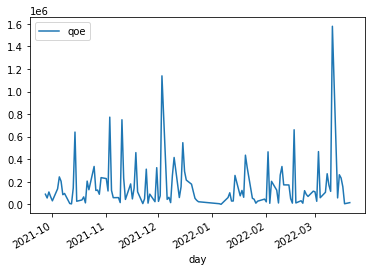

In [26]:
df.groupby('day')["qoe"].count().reset_index().sort_values(by="day").plot(x="day", y="qoe")

## Συσχέτιση μεταξύ city_id και country_id

In [27]:
from scipy import stats
x = df['country_id']
y = df['city_id']
stats.pearsonr(x, y)

(0.14774332870778492, 0.0)

## Έλεγχος για πιθανό χαμηλό engagement τις Παρασκευές

In [28]:
df.groupby('WeekDayNumber')['engagement'].count()

WeekDayNumber
1    2247173
2    2387965
3    4609472
4    4891494
5    5298244
Name: engagement, dtype: int64

In [29]:
df_monday = df[df['WeekDay'] == 'Monday']
df_monday.groupby('engagement')["viewer_id"].count().reset_index().rename(columns={"Unnamed: 0": "n_qoes"})

,engagement,viewer_id
0,0.000000,1058667
1,0.000003,1
2,0.000012,1
3,0.000023,1
4,0.000027,1
...,...,...
40407,0.999940,1
40408,0.999943,1
40409,0.999960,1
40410,0.999997,2


<AxesSubplot:xlabel='engagement'>

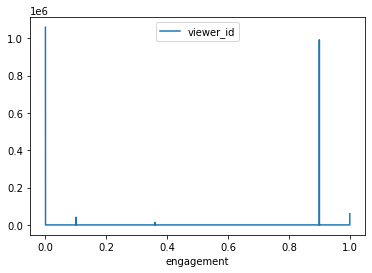

In [30]:
df_monday.groupby('engagement')["viewer_id"].count().reset_index().rename(columns={"Unnamed: 0": "n_qoes"}).sort_values(by="engagement").plot(x="engagement", y="viewer_id")

In [31]:
df_tuesday = df[df['WeekDay'] == 'Tuesday']
df_tuesday.groupby('engagement')["viewer_id"].count().reset_index().rename(columns={"Unnamed: 0": "n_qoes"})

,engagement,viewer_id
0,0.000000,1112511
1,0.000030,3
2,0.000040,1
3,0.000043,1
4,0.000070,1
...,...,...
39780,0.999933,2
39781,0.999947,1
39782,0.999963,1
39783,0.999977,1


<AxesSubplot:xlabel='engagement'>

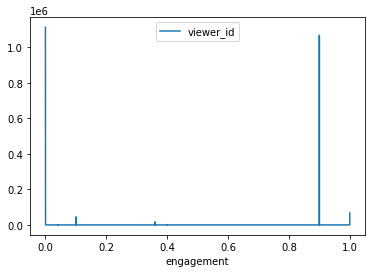

In [32]:
df_tuesday.groupby('engagement')["viewer_id"].count().reset_index().rename(columns={"Unnamed: 0": "n_qoes"}).sort_values(by="engagement").plot(x="engagement", y="viewer_id")

In [33]:
df_wednesday = df[df['WeekDay'] == 'Wednesday']
df_wednesday.groupby('engagement')["viewer_id"].count().reset_index().rename(columns={"Unnamed: 0": "n_qoes"})

,engagement,viewer_id
0,0.000000,2206939
1,0.000003,2
2,0.000023,1
3,0.000030,4
4,0.000060,2
...,...,...
53140,0.999970,2
53141,0.999973,1
53142,0.999980,1
53143,0.999997,1


<AxesSubplot:xlabel='engagement'>

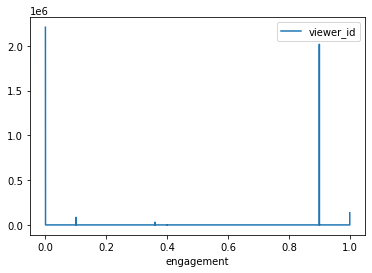

In [34]:
df_wednesday.groupby('engagement')["viewer_id"].count().reset_index().rename(columns={"Unnamed: 0": "n_qoes"}).sort_values(by="engagement").plot(x="engagement", y="viewer_id")

In [35]:
df_thursday = df[df['WeekDay'] == 'Thursday']
df_thursday.groupby('engagement')["viewer_id"].count().reset_index().rename(columns={"Unnamed: 0": "n_qoes"})

,engagement,viewer_id
0,0.000000,2279684
1,0.000010,2
2,0.000012,2
3,0.000030,7
4,0.000048,1
...,...,...
58017,0.999963,1
58018,0.999973,1
58019,0.999993,1
58020,0.999997,1


<AxesSubplot:xlabel='engagement'>

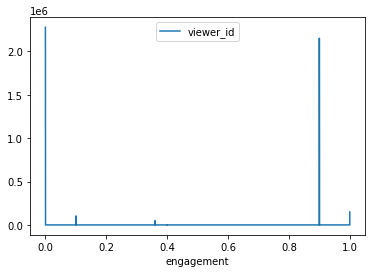

In [36]:
df_thursday.groupby('engagement')["viewer_id"].count().reset_index().rename(columns={"Unnamed: 0": "n_qoes"}).sort_values(by="engagement").plot(x="engagement", y="viewer_id")

In [37]:
df_friday = df[df['WeekDay'] == 'Friday']
df_friday.groupby('engagement')["viewer_id"].count().reset_index().rename(columns={"Unnamed: 0": "n_qoes"})

,engagement,viewer_id
0,0.000000,2591669
1,0.000020,1
2,0.000030,4
3,0.000057,1
4,0.000060,3
...,...,...
52772,0.999913,1
52773,0.999917,2
52774,0.999937,1
52775,0.999967,2


<AxesSubplot:xlabel='engagement'>

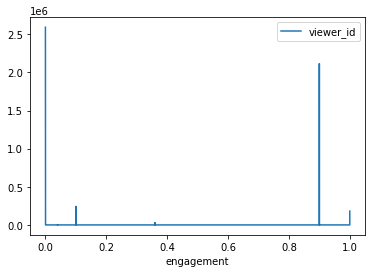

In [38]:
df_friday.groupby('engagement')["viewer_id"].count().reset_index().rename(columns={"Unnamed: 0": "n_qoes"}).sort_values(by="engagement").plot(x="engagement", y="viewer_id")

In [32]:
from sklearn.preprocessing import KBinsDiscretizer
from math import ceil

est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
# process of discretization on the total dataset
qoe_np_array = df['engagement']

x = qoe_np_array.to_numpy()

x_reshape = x.reshape((len(x),1))
est.fit(x_reshape)
y = est.transform(x_reshape)
discretize_buffer = y.flatten()
df['discretize_engagement'] = discretize_buffer

In [40]:
df_monday = df[df['WeekDay'] == 'Monday']
df_monday.groupby('discretize_engagement')["viewer_id"].count().reset_index().rename(columns={"Unnamed: 0": "n_qoes"})

,discretize_engagement,viewer_id
0,0.0,1118865
1,1.0,25512
2,2.0,11739
3,3.0,13945
4,4.0,1077112


<AxesSubplot:xlabel='discretize_engagement'>

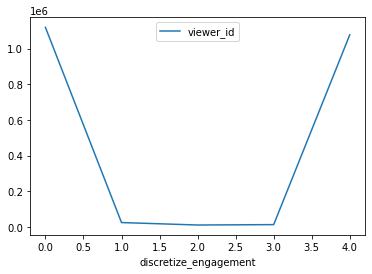

In [41]:
df_monday.groupby('discretize_engagement')["viewer_id"].count().reset_index().rename(columns={"Unnamed: 0": "n_qoes"}).sort_values(by="discretize_engagement").plot(x="discretize_engagement", y="viewer_id")

In [42]:
df_tuesday = df[df['WeekDay'] == 'Tuesday']
df_tuesday.groupby('discretize_engagement')["viewer_id"].count().reset_index().rename(columns={"Unnamed: 0": "n_qoes"})

,discretize_engagement,viewer_id
0,0.0,1176155
1,1.0,28573
2,2.0,11457
3,3.0,12659
4,4.0,1159121


<AxesSubplot:xlabel='discretize_engagement'>

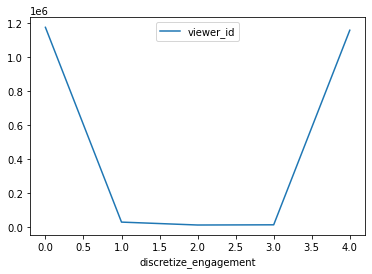

In [43]:
df_tuesday.groupby('discretize_engagement')["viewer_id"].count().reset_index().rename(columns={"Unnamed: 0": "n_qoes"}).sort_values(by="discretize_engagement").plot(x="discretize_engagement", y="viewer_id")

In [44]:
df_wednesday = df[df['WeekDay'] == 'Wednesday']
df_wednesday.groupby('discretize_engagement')["viewer_id"].count().reset_index().rename(columns={"Unnamed: 0": "n_qoes"})

,discretize_engagement,viewer_id
0,0.0,2320770
1,1.0,48388
2,2.0,19447
3,3.0,21102
4,4.0,2199765


<AxesSubplot:xlabel='discretize_engagement'>

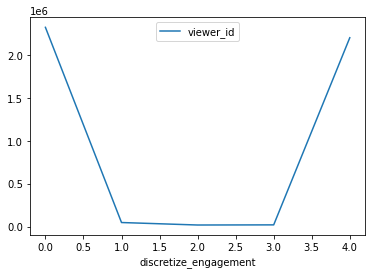

In [45]:
df_wednesday.groupby('discretize_engagement')["viewer_id"].count().reset_index().rename(columns={"Unnamed: 0": "n_qoes"}).sort_values(by="discretize_engagement").plot(x="discretize_engagement", y="viewer_id")

In [46]:
df_thursday = df[df['WeekDay'] == 'Thursday']
df_thursday.groupby('discretize_engagement')["viewer_id"].count().reset_index().rename(columns={"Unnamed: 0": "n_qoes"})

,discretize_engagement,viewer_id
0,0.0,2419767
1,1.0,70526
2,2.0,23872
3,3.0,24626
4,4.0,2352703


<AxesSubplot:xlabel='discretize_engagement'>

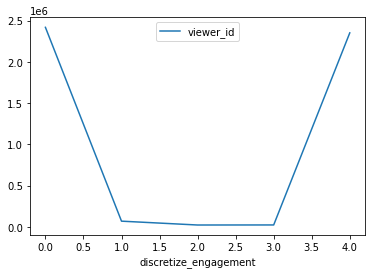

In [47]:
df_thursday.groupby('discretize_engagement')["viewer_id"].count().reset_index().rename(columns={"Unnamed: 0": "n_qoes"}).sort_values(by="discretize_engagement").plot(x="discretize_engagement", y="viewer_id")

In [48]:
df_friday = df[df['WeekDay'] == 'Friday']
df_friday.groupby('discretize_engagement')["viewer_id"].count().reset_index().rename(columns={"Unnamed: 0": "n_qoes"})

,discretize_engagement,viewer_id
0,0.0,2872607
1,1.0,49529
2,2.0,20661
3,3.0,21390
4,4.0,2334057


<AxesSubplot:xlabel='discretize_engagement'>

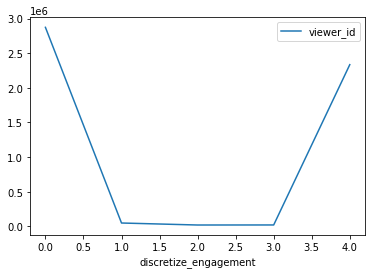

In [49]:
df_friday.groupby('discretize_engagement')["viewer_id"].count().reset_index().rename(columns={"Unnamed: 0": "n_qoes"}).sort_values(by="discretize_engagement").plot(x="discretize_engagement", y="viewer_id")

## Έλεγχος για πιθανό correlation μεταξύ qoe και engagement, όταν qoe = 1. Δηλαδή υποθέτουμε ότι όταν το qoe είναι μέγιστο θα έχει μεγάλες τιμές και το engagement

In [50]:
from scipy import stats
from scipy.stats import pearsonr

In [51]:
import math

In [52]:
max_qoe = df['qoe'].max()
max_qoe

1.0

In [53]:
df_max_qoe = df[df['qoe'] == max_qoe]

In [54]:
df_max_qoe

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,date,day,month,QoE,discretize_buffer,discretize_QoE,WeekDay,WeekDayNumber,discretize_engagement
2,1632762108299,5.0,107.0,15129.0,19.0,3.0,WFH,1.0,0.9,0,2021-09-27 17:01:48.299,2021-09-27,0,0.995236,0.0,4.0,Monday,1,4.0
4,1632762129231,5.0,107.0,4483.0,2.0,3.0,WFO,1.0,0.0,0,2021-09-27 17:02:09.231,2021-09-27,0,0.995236,0.0,4.0,Monday,1,0.0
5,1632762134093,5.0,107.0,105152.0,62.0,3.0,WFH,1.0,0.0,0,2021-09-27 17:02:14.093,2021-09-27,0,0.995236,0.0,4.0,Monday,1,0.0
6,1632762160299,5.0,107.0,4168.0,2.0,3.0,WFO,1.0,0.9,0,2021-09-27 17:02:40.299,2021-09-27,0,0.995236,0.0,4.0,Monday,1,4.0
8,1632762181546,5.0,107.0,4623.0,2.0,3.0,WFO,1.0,0.9,0,2021-09-27 17:03:01.546,2021-09-27,0,0.995236,0.0,4.0,Monday,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20615365,1647872264309,1.0,401.0,845.0,19.0,3.0,WFO,1.0,0.0,0,2022-03-21 14:17:44.309,2022-03-21,5,0.981789,0.0,4.0,Monday,1,0.0
20615366,1647872276879,1.0,401.0,11100.0,3963.0,3.0,WFO,1.0,0.0,0,2022-03-21 14:17:56.879,2022-03-21,5,0.981789,0.0,4.0,Monday,1,0.0
20615367,1647872288293,1.0,401.0,2155.0,6.0,1.0,WFO,1.0,0.0,0,2022-03-21 14:18:08.293,2022-03-21,5,0.981789,0.0,4.0,Monday,1,0.0
20615368,1647872288564,1.0,401.0,1011.0,19.0,3.0,WFO,1.0,0.9,0,2022-03-21 14:18:08.564,2022-03-21,5,0.981789,0.0,4.0,Monday,1,4.0


In [55]:
df_max_qoe.groupby('engagement')["viewer_id"].count().reset_index()

,engagement,viewer_id
0,0.000000,8794897
1,0.000003,3
2,0.000010,2
3,0.000012,3
4,0.000023,2
...,...,...
95718,0.999977,1
95719,0.999980,1
95720,0.999993,1
95721,0.999997,3


<AxesSubplot:xlabel='engagement'>

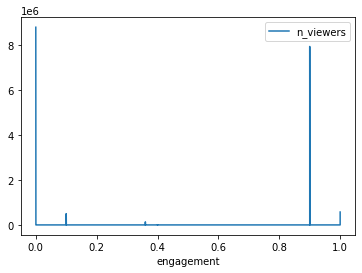

In [56]:
df_max_qoe.groupby('engagement')['viewer_id'].count().reset_index().rename(columns={"viewer_id": "n_viewers"}).sort_values(by="engagement").plot(x="engagement", y="n_viewers")

In [57]:
min_qoe = df['qoe'].min()

In [58]:
df_min_qoe = df[df['qoe'] == min_qoe]

<AxesSubplot:xlabel='engagement'>

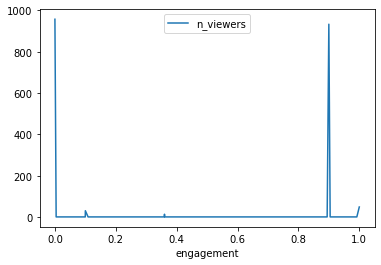

In [59]:
df_min_qoe.groupby('engagement')['viewer_id'].count().reset_index().rename(columns={"viewer_id": "n_viewers"}).sort_values(by="engagement").plot(x="engagement", y="n_viewers")

<AxesSubplot:xlabel='discretize_engagement'>

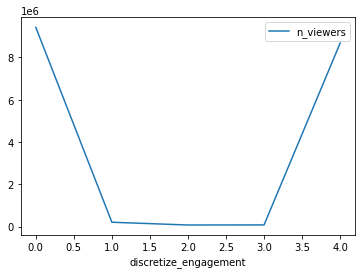

In [60]:
df_max_qoe.groupby('discretize_engagement')['viewer_id'].count().reset_index().rename(columns={"viewer_id": "n_viewers"}).sort_values(by="discretize_engagement").plot(x="discretize_engagement", y="n_viewers")

<AxesSubplot:xlabel='discretize_engagement'>

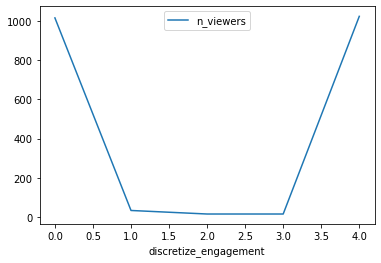

In [61]:
df_min_qoe.groupby('discretize_engagement')['viewer_id'].count().reset_index().rename(columns={"viewer_id": "n_viewers"}).sort_values(by="discretize_engagement").plot(x="discretize_engagement", y="n_viewers")

## Έλεγχος για υψηλό engagement όταν το location είναι work from office

In [62]:
df_wfo = df[df['viewer_type'] == 'WFO']

In [63]:
df_wfo.groupby('engagement')["viewer_id"].count().reset_index()

,engagement,viewer_id
0,0.000000,6722763
1,0.000003,2
2,0.000010,2
3,0.000012,3
4,0.000020,1
...,...,...
84424,0.999970,2
84425,0.999973,2
84426,0.999980,1
84427,0.999997,3


<AxesSubplot:xlabel='engagement'>

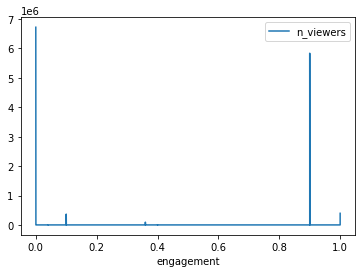

In [64]:
df_wfo.groupby('engagement')['viewer_id'].count().reset_index().rename(columns={"viewer_id": "n_viewers"}).sort_values(by="engagement").plot(x="engagement", y="n_viewers")

<AxesSubplot:xlabel='discretize_engagement'>

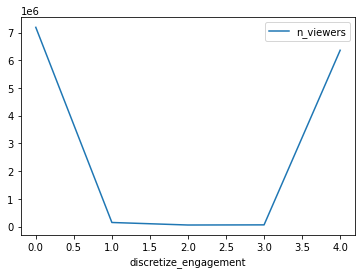

In [65]:
df_wfo.groupby('discretize_engagement')['viewer_id'].count().reset_index().rename(columns={"viewer_id": "n_viewers"}).sort_values(by="discretize_engagement").plot(x="discretize_engagement", y="n_viewers")

## Έλεγχος για χαμηλό engagement όταν το location είναι work from WFH

In [34]:
df_wfh = df[df['viewer_type'] == 'WFH']

In [35]:
df_wfh.groupby('engagement')["viewer_id"].count().reset_index()

,engagement,viewer_id
0,0.000000,2526707
1,0.000003,1
2,0.000030,8
3,0.000040,1
4,0.000048,1
...,...,...
62499,0.999967,1
62500,0.999977,1
62501,0.999993,1
62502,0.999997,1


<AxesSubplot:xlabel='engagement'>

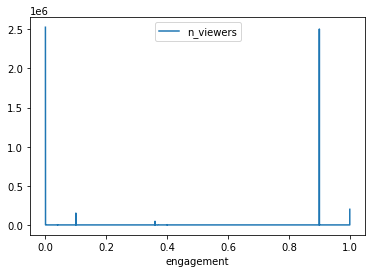

In [36]:
df_wfh.groupby('engagement')['viewer_id'].count().reset_index().rename(columns={"viewer_id": "n_viewers"}).sort_values(by="engagement").plot(x="engagement", y="n_viewers")

<AxesSubplot:xlabel='discretize_engagement'>

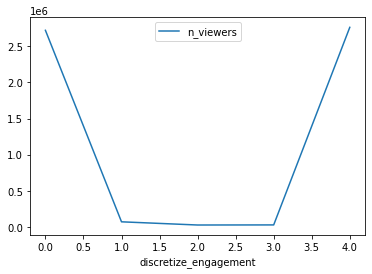

In [37]:
df_wfh.groupby('discretize_engagement')['viewer_id'].count().reset_index().rename(columns={"viewer_id": "n_viewers"}).sort_values(by="discretize_engagement").plot(x="discretize_engagement", y="n_viewers")

## Έλεγχος για correlation μεταξύ qoe και buffer_ms

In [38]:
from sklearn.preprocessing import KBinsDiscretizer
from math import ceil

est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
# process of discretization on the total dataset
qoe_np_array = df['qoe']

x = qoe_np_array.to_numpy()

x_reshape = x.reshape((len(x),1))
est.fit(x_reshape)
y = est.transform(x_reshape)
discretize_buffer = y.flatten()
df['discretize_qoe'] = discretize_buffer

In [39]:
df.groupby('discretize_buffer').count()

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,date,day,month,QoE,discretize_QoE,WeekDay,WeekDayNumber,discretize_engagement,discretize_qoe
discretize_buffer,,,,,,,,,,,,,,,,,,,
0.0,19434316,19434316,19434316,19434316,19434316,19434316,19434316,19434316,19434316,19434316,19434316,19434316,19434316,19434316,19434316,19434316,19434316,19434316,19434316
1.0,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
2.0,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
3.0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
4.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [40]:
max_buffer = df['discretize_buffer'].max() 

In [41]:
df_max_buffer = df[df['discretize_buffer'] == max_buffer ]

In [42]:
df_max_buffer

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,date,day,month,QoE,discretize_buffer,discretize_QoE,WeekDay,WeekDayNumber,discretize_engagement,discretize_qoe
14266658,1638528846009,0.0,1.0,108781.0,0.0,0.0,WFO,0.321768,0.10332,10376955,2021-12-03 10:54:06.009,2021-12-03,2,0.99394,4.0,4.0,Friday,5,0.0,1.0
14266660,1638528855594,0.0,1.0,108832.0,0.0,0.0,WFO,0.491788,0.31269,10367522,2021-12-03 10:54:15.594,2021-12-03,2,0.99394,4.0,4.0,Friday,5,1.0,2.0


In [43]:
min_buffer = df['discretize_buffer'].min()

In [44]:
df_min_buffer = df[df['discretize_buffer'] == min_buffer]

In [45]:
df_min_buffer.groupby('discretize_qoe').count()

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,date,day,month,QoE,discretize_buffer,discretize_QoE,WeekDay,WeekDayNumber,discretize_engagement
discretize_qoe,,,,,,,,,,,,,,,,,,,
0.0,89722,89722,89722,89722,89722,89722,89722,89722,89722,89722,89722,89722,89722,89722,89722,89722,89722,89722,89722
1.0,107222,107222,107222,107222,107222,107222,107222,107222,107222,107222,107222,107222,107222,107222,107222,107222,107222,107222,107222
2.0,163115,163115,163115,163115,163115,163115,163115,163115,163115,163115,163115,163115,163115,163115,163115,163115,163115,163115,163115
3.0,141245,141245,141245,141245,141245,141245,141245,141245,141245,141245,141245,141245,141245,141245,141245,141245,141245,141245,141245
4.0,18933012,18933012,18933012,18933012,18933012,18933012,18933012,18933012,18933012,18933012,18933012,18933012,18933012,18933012,18933012,18933012,18933012,18933012,18933012


## Έλεγχος για correlation μεταξύ engemenet και buffer_ms

In [46]:
df_min_buffer = df[df['buffer_ms'] == min_buffer]
df_min_buffer

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,date,day,month,QoE,discretize_buffer,discretize_QoE,WeekDay,WeekDayNumber,discretize_engagement,discretize_qoe
2,1632762108299,5.0,107.0,15129.0,19.0,3.0,WFH,1.0,0.9,0,2021-09-27 17:01:48.299,2021-09-27,0,0.995236,0.0,4.0,Monday,1,4.0,4.0
4,1632762129231,5.0,107.0,4483.0,2.0,3.0,WFO,1.0,0.0,0,2021-09-27 17:02:09.231,2021-09-27,0,0.995236,0.0,4.0,Monday,1,0.0,4.0
5,1632762134093,5.0,107.0,105152.0,62.0,3.0,WFH,1.0,0.0,0,2021-09-27 17:02:14.093,2021-09-27,0,0.995236,0.0,4.0,Monday,1,0.0,4.0
6,1632762160299,5.0,107.0,4168.0,2.0,3.0,WFO,1.0,0.9,0,2021-09-27 17:02:40.299,2021-09-27,0,0.995236,0.0,4.0,Monday,1,4.0,4.0
8,1632762181546,5.0,107.0,4623.0,2.0,3.0,WFO,1.0,0.9,0,2021-09-27 17:03:01.546,2021-09-27,0,0.995236,0.0,4.0,Monday,1,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20615365,1647872264309,1.0,401.0,845.0,19.0,3.0,WFO,1.0,0.0,0,2022-03-21 14:17:44.309,2022-03-21,5,0.981789,0.0,4.0,Monday,1,0.0,4.0
20615366,1647872276879,1.0,401.0,11100.0,3963.0,3.0,WFO,1.0,0.0,0,2022-03-21 14:17:56.879,2022-03-21,5,0.981789,0.0,4.0,Monday,1,0.0,4.0
20615367,1647872288293,1.0,401.0,2155.0,6.0,1.0,WFO,1.0,0.0,0,2022-03-21 14:18:08.293,2022-03-21,5,0.981789,0.0,4.0,Monday,1,0.0,4.0
20615368,1647872288564,1.0,401.0,1011.0,19.0,3.0,WFO,1.0,0.9,0,2022-03-21 14:18:08.564,2022-03-21,5,0.981789,0.0,4.0,Monday,1,4.0,4.0


In [47]:
df_min_buffer.groupby('discretize_engagement').count()

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,date,day,month,QoE,discretize_buffer,discretize_QoE,WeekDay,WeekDayNumber,discretize_qoe
discretize_engagement,,,,,,,,,,,,,,,,,,,
0.0,9742615,9742615,9742615,9742615,9742615,9742615,9742615,9742615,9742615,9742615,9742615,9742615,9742615,9742615,9742615,9742615,9742615,9742615,9742615
1.0,216750,216750,216750,216750,216750,216750,216750,216750,216750,216750,216750,216750,216750,216750,216750,216750,216750,216750,216750
2.0,82462,82462,82462,82462,82462,82462,82462,82462,82462,82462,82462,82462,82462,82462,82462,82462,82462,82462,82462
3.0,87172,87172,87172,87172,87172,87172,87172,87172,87172,87172,87172,87172,87172,87172,87172,87172,87172,87172,87172
4.0,8963694,8963694,8963694,8963694,8963694,8963694,8963694,8963694,8963694,8963694,8963694,8963694,8963694,8963694,8963694,8963694,8963694,8963694,8963694


<AxesSubplot:xlabel='discretize_engagement'>

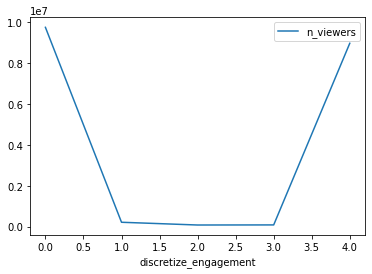

In [48]:
df_min_buffer.groupby('discretize_engagement')['viewer_id'].count().reset_index().rename(columns={"viewer_id": "n_viewers"}).sort_values(by="discretize_engagement").plot(x="discretize_engagement", y="n_viewers")

# Correlations for QoE

## Between QoE and number of viewers during the event

In [35]:
QoE_of_events = df.groupby('event_id')['QoE']

In [50]:
len(QoE_of_events)

499

In [36]:
QoE_of_events = QoE_of_events.describe()

In [37]:
QoE_of_events.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [38]:
cols = ['count', 'mean', 'std', 'min', '25%', '50%', '75%']

In [39]:
QoE_of_events.drop(cols, inplace=True, axis=1)

In [40]:
QoE_of_events.rename(columns = {'max':'QoE'}, inplace = True)

In [41]:
QoE_of_events.head()

,QoE
event_id,
0.0,0.989831
1.0,0.993940
2.0,0.970865
3.0,0.989034
4.0,0.992926


In [57]:
grouped_by_events = df.groupby('event_id')
grouped_by_events = grouped_by_events.agg({"viewer_id": "nunique"})
viewers_of_events = grouped_by_events.reset_index()

In [58]:
viewers_of_events.rename(columns = {'viewer_id':'No_of_viewers'}, inplace = True)

In [59]:
events = viewers_of_events.join(QoE_of_events, on='event_id')
events

,event_id,No_of_viewers,QoE
0,0.0,3428,0.989831
1,1.0,3364,0.993940
2,2.0,3834,0.970865
3,3.0,3323,0.989034
4,4.0,1461,0.992926
...,...,...,...
494,720.0,4,0.998686
495,721.0,3,0.916630
496,723.0,4,0.985763
497,726.0,2,0.997153


In [60]:
events['No_of_viewers'].corr(events['QoE'])

0.017224579504283386

In [61]:
from scipy import stats
x = events['No_of_viewers']
y = events['QoE']
stats.pearsonr(x, y)

(0.017224579504283376, 0.7011033568063721)

## Between QoE and day of the event

In [62]:
df.head()

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,date,day,month,QoE,discretize_buffer,discretize_QoE,WeekDay,WeekDayNumber,discretize_engagement,discretize_qoe
0,1632762065906,5.0,107.0,11661.0,2.0,3.0,WFO,0.999976,0.0,785,2021-09-27 17:01:05.906,2021-09-27,0,0.995236,0.0,4.0,Monday,1,0.0,4.0
1,1632762104254,5.0,107.0,12810.0,2.0,3.0,WFH,0.281964,0.9,3895,2021-09-27 17:01:44.254,2021-09-27,0,0.995236,0.0,4.0,Monday,1,4.0,1.0
2,1632762108299,5.0,107.0,15129.0,19.0,3.0,WFH,1.000000,0.9,0,2021-09-27 17:01:48.299,2021-09-27,0,0.995236,0.0,4.0,Monday,1,4.0,4.0
3,1632762112510,5.0,107.0,5860.0,217.0,3.0,WFH,0.999988,0.0,466,2021-09-27 17:01:52.510,2021-09-27,0,0.995236,0.0,4.0,Monday,1,0.0,4.0
4,1632762129231,5.0,107.0,4483.0,2.0,3.0,WFO,1.000000,0.0,0,2021-09-27 17:02:09.231,2021-09-27,0,0.995236,0.0,4.0,Monday,1,0.0,4.0


In [63]:
event_day = df.groupby('event_id')['WeekDayNumber']

In [64]:
event_day = event_day.describe()

In [65]:
cols = ['count', 'unique', 'freq']

In [66]:
event_day

,count,unique,top,freq
event_id,,,,
0.0,1096821,1,5,1096821
1.0,1020610,1,5,1020610
2.0,709163,1,3,709163
3.0,403835,1,4,403835
4.0,375996,1,4,375996
...,...,...,...,...
720.0,145,1,1,145
721.0,136,1,1,136
723.0,128,1,4,128


In [67]:
event_day.drop(cols, inplace=True, axis=1)

In [68]:
event_day.rename(columns = {'top':'Day_of_the_event'}, inplace = True)

In [69]:
events = event_day.join(QoE_of_events, on='event_id')

In [70]:
events

,Day_of_the_event,QoE
event_id,,
0.0,5,0.989831
1.0,5,0.993940
2.0,3,0.970865
3.0,4,0.989034
4.0,4,0.992926
...,...,...
720.0,1,0.998686
721.0,1,0.916630
723.0,4,0.985763


In [71]:
events['Day_of_the_event'] = events['Day_of_the_event'].astype('int')

In [72]:
events['Day_of_the_event'].corr(events['QoE'])

0.024887251417339495

In [73]:
from sklearn.preprocessing import KBinsDiscretizer
from math import ceil

est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
# process of discretization on the total dataset
qoe_np_array = events['QoE']

x = qoe_np_array.to_numpy()

x_reshape = x.reshape((len(x),1))
est.fit(x_reshape)
y = est.transform(x_reshape)
discretize_buffer = y.flatten()
events['discretize_QoE'] = discretize_buffer

In [74]:
from scipy import stats
x = events['Day_of_the_event']
y = events['QoE']
stats.pearsonr(x, y)

(0.024887251417339457, 0.5791472482091319)

In [75]:
events

,Day_of_the_event,QoE,discretize_QoE
event_id,,,
0.0,5,0.989831,4.0
1.0,5,0.993940,4.0
2.0,3,0.970865,4.0
3.0,4,0.989034,4.0
4.0,4,0.992926,4.0
...,...,...,...
720.0,1,0.998686,4.0
721.0,1,0.916630,4.0
723.0,4,0.985763,4.0


In [76]:
from sklearn.linear_model import LinearRegression
X = events['Day_of_the_event'].to_frame()
y = events['QoE'].values
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.0006193752831098465

In [77]:
events_monday = events[events['Day_of_the_event'] == 1]
events_monday.groupby('discretize_QoE').count()

,Day_of_the_event,QoE
discretize_QoE,,
0.0,1,1
4.0,77,77


In [78]:
events_tuesday = events[events['Day_of_the_event'] == 2]
events_tuesday.groupby('discretize_QoE').count()

,Day_of_the_event,QoE
discretize_QoE,,
3.0,1,1
4.0,86,86


In [79]:
events_wed = events[events['Day_of_the_event'] == 3]
events_wed.groupby('discretize_QoE').count()

,Day_of_the_event,QoE
discretize_QoE,,
3.0,1,1
4.0,118,118


In [80]:
events_thu = events[events['Day_of_the_event'] == 4]
events_thu.groupby('discretize_QoE').count()

,Day_of_the_event,QoE
discretize_QoE,,
1.0,1,1
3.0,2,2
4.0,110,110


In [81]:
events_fri = events[events['Day_of_the_event'] == 5]
events_fri.groupby('discretize_QoE').count()

,Day_of_the_event,QoE
discretize_QoE,,
2.0,1,1
3.0,3,3
4.0,98,98


## Between QoE and duration of the event

In [12]:
events = df.groupby('event_id')
duration = []
for i in events.groups.keys():
    event = df[df['event_id'] == i]
    end_time = event['timestamp'].max()
    start_time = event['timestamp'].min()
    duration_of_event = (end_time - start_time) * 1.66666667*10**(-5)
    duration.append( duration_of_event)

In [13]:
events_duration = df.groupby('event_id').count()

In [14]:
events_duration['duration'] = duration

In [15]:
cols = ['duration']
events_duration = events_duration[cols]

In [16]:
events_duration

,duration
event_id,
0.0,199.568517
1.0,178.678934
2.0,119.830784
3.0,74.484883
4.0,463.499018
...,...
720.0,17.991150
721.0,22.990533
723.0,22.338967


In [87]:
events = events_duration.join(QoE_of_events, on='event_id')
events

,duration,QoE
event_id,,
0.0,199.568517,0.989831
1.0,178.678934,0.993940
2.0,119.830784,0.970865
3.0,74.484883,0.989034
4.0,463.499018,0.992926
...,...,...
720.0,17.991150,0.998686
721.0,22.990533,0.916630
723.0,22.338967,0.985763


In [88]:
from scipy import stats
x = events['duration']
y = events['QoE']
stats.pearsonr(x, y)

(-0.012209853411272611, 0.7855654411195808)

In [89]:
from sklearn.preprocessing import KBinsDiscretizer
from math import ceil

est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
# process of discretization on the total dataset
duration_np_array = events['duration']

x = duration_np_array.to_numpy()

x_reshape = x.reshape((len(x),1))
est.fit(x_reshape)
y = est.transform(x_reshape)
discretize_duration = y.flatten()
events['discretize_duration'] = discretize_duration

In [90]:
from sklearn.preprocessing import KBinsDiscretizer
from math import ceil

est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
# process of discretization on the total dataset
QoE_np_array = events['QoE']

x = QoE_np_array.to_numpy()

x_reshape = x.reshape((len(x),1))
est.fit(x_reshape)
y = est.transform(x_reshape)
discretize_QoE = y.flatten()
events['discretize_QoE'] = discretize_QoE

In [91]:
events

,duration,QoE,discretize_duration,discretize_QoE
event_id,,,,
0.0,199.568517,0.989831,1.0,4.0
1.0,178.678934,0.993940,1.0,4.0
2.0,119.830784,0.970865,0.0,4.0
3.0,74.484883,0.989034,0.0,4.0
4.0,463.499018,0.992926,2.0,4.0
...,...,...,...,...
720.0,17.991150,0.998686,0.0,4.0
721.0,22.990533,0.916630,0.0,4.0
723.0,22.338967,0.985763,0.0,4.0


In [92]:
from scipy import stats
x = events['discretize_duration']
y = events['discretize_QoE']
stats.pearsonr(x, y)

(0.024970095756140072, 0.5778844187938283)

In [93]:
events.groupby('discretize_duration')['discretize_QoE'].count()

discretize_duration
0.0    476
1.0     18
2.0      5
Name: discretize_QoE, dtype: int64

In [94]:
event_with_dur0 = events[events['discretize_duration'] == 0]
event_with_dur0.groupby('discretize_QoE').count()

,duration,QoE,discretize_duration
discretize_QoE,,,
0.0,1,1,1
1.0,1,1,1
2.0,1,1,1
3.0,7,7,7
4.0,466,466,466


In [95]:
event_with_dur1 = events[events['discretize_duration'] == 1]
event_with_dur1.groupby('discretize_QoE').count()

,duration,QoE,discretize_duration
discretize_QoE,,,
4.0,18,18,18


In [96]:
event_with_dur2 = events[events['discretize_duration'] == 2]
event_with_dur2.groupby('discretize_QoE').count()

,duration,QoE,discretize_duration
discretize_QoE,,,
4.0,5,5,5


## Between QoE and number of countries each customer reach

In [97]:
grouped_by_events = df.groupby('event_id')
grouped_by_events = grouped_by_events.agg({"country_id": "nunique"})
countries_of_events = grouped_by_events.reset_index()

In [98]:
countries_of_events.rename(columns = {'country_id':'No_of_countries'}, inplace = True)

In [99]:
df = df.merge(countries_of_events, on='event_id')

In [100]:
df.head()

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,...,day,month,QoE,discretize_buffer,discretize_QoE,WeekDay,WeekDayNumber,discretize_engagement,discretize_qoe,No_of_countries
0,1632762065906,5.0,107.0,11661.0,2.0,3.0,WFO,0.999976,0.0,785,...,2021-09-27,0,0.995236,0.0,4.0,Monday,1,0.0,4.0,1
1,1632762104254,5.0,107.0,12810.0,2.0,3.0,WFH,0.281964,0.9,3895,...,2021-09-27,0,0.995236,0.0,4.0,Monday,1,4.0,1.0,1
2,1632762108299,5.0,107.0,15129.0,19.0,3.0,WFH,1.000000,0.9,0,...,2021-09-27,0,0.995236,0.0,4.0,Monday,1,4.0,4.0,1
3,1632762112510,5.0,107.0,5860.0,217.0,3.0,WFH,0.999988,0.0,466,...,2021-09-27,0,0.995236,0.0,4.0,Monday,1,0.0,4.0,1
4,1632762129231,5.0,107.0,4483.0,2.0,3.0,WFO,1.000000,0.0,0,...,2021-09-27,0,0.995236,0.0,4.0,Monday,1,0.0,4.0,1


In [101]:
events = countries_of_events.join(QoE_of_events, on='event_id')

In [102]:
events

,event_id,No_of_countries,QoE
0,0.0,4,0.989831
1,1.0,4,0.993940
2,2.0,29,0.970865
3,3.0,4,0.989034
4,4.0,17,0.992926
...,...,...,...
494,720.0,1,0.998686
495,721.0,1,0.916630
496,723.0,1,0.985763
497,726.0,1,0.997153


In [103]:
events['No_of_countries'].corr(events['QoE'])

-0.07349804828588549

In [104]:
from scipy import stats
x = events['No_of_countries']
y = events['QoE']
stats.pearsonr(x, y)

(-0.07349804828588549, 0.10102116215424214)

## Between QoE and country

In [18]:
df.groupby('country_id').count()

,timestamp,customer_id,event_id,viewer_id,city_id,viewer_type,qoe,engagement,buffer_ms,date,day,month,QoE,discretize_buffer,discretize_QoE,WeekDay,WeekDayNumber
country_id,,,,,,,,,,,,,,,,,
0.0,4058483,4058483,4058483,4058483,4058483,4058483,4058483,4058483,4058483,4058483,4058483,4058483,4058483,4058483,4058483,4058483,4058483
1.0,3117067,3117067,3117067,3117067,3117067,3117067,3117067,3117067,3117067,3117067,3117067,3117067,3117067,3117067,3117067,3117067,3117067
2.0,2464945,2464945,2464945,2464945,2464945,2464945,2464945,2464945,2464945,2464945,2464945,2464945,2464945,2464945,2464945,2464945,2464945
3.0,2356719,2356719,2356719,2356719,2356719,2356719,2356719,2356719,2356719,2356719,2356719,2356719,2356719,2356719,2356719,2356719,2356719
4.0,1308771,1308771,1308771,1308771,1308771,1308771,1308771,1308771,1308771,1308771,1308771,1308771,1308771,1308771,1308771,1308771,1308771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117.0,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79
118.0,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54
120.0,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26


In [19]:
countries = df[df['country_id']<= 20]

In [20]:
average_QoE_per_country = []
for i in range (0, 21):
    country = countries[countries['country_id'] == i ]
    mean_qoe = country['QoE'].mean()
    average_QoE_per_country.append(mean_qoe)

In [21]:
len(average_QoE_per_country)

21

In [22]:
country_ids = [*range(0, 21, 1)]

In [23]:
countries = pd.DataFrame(list(zip(country_ids, average_QoE_per_country)),columns =['country_id', 'average_QoE'])

In [24]:
countries

,country_id,average_QoE
0,0,0.988995
1,1,0.976205
2,2,0.984696
3,3,0.985839
4,4,0.982023
5,5,0.993364
6,6,0.991356
7,7,0.954337
8,8,0.970315
9,9,0.993114


In [25]:
from scipy import stats
x = countries['country_id']
y = countries['average_QoE']
stats.pearsonr(x, y)

(-0.4460626102285108, 0.042682379731252)

## Between QoE and Viewers’ retention

In [26]:
from statistics import mean

In [27]:
events = df.groupby('event_id').count()
events

,timestamp,customer_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,date,day,month,QoE,discretize_buffer,discretize_QoE,WeekDay,WeekDayNumber
event_id,,,,,,,,,,,,,,,,,
0.0,1096821,1096821,1096821,1096821,1096821,1096821,1096821,1096821,1096821,1096821,1096821,1096821,1096821,1096821,1096821,1096821,1096821
1.0,1020610,1020610,1020610,1020610,1020610,1020610,1020610,1020610,1020610,1020610,1020610,1020610,1020610,1020610,1020610,1020610,1020610
2.0,709163,709163,709163,709163,709163,709163,709163,709163,709163,709163,709163,709163,709163,709163,709163,709163,709163
3.0,403835,403835,403835,403835,403835,403835,403835,403835,403835,403835,403835,403835,403835,403835,403835,403835,403835
4.0,375996,375996,375996,375996,375996,375996,375996,375996,375996,375996,375996,375996,375996,375996,375996,375996,375996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720.0,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145
721.0,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136
723.0,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128


In [28]:
# First we calculate the average time that a viewer participates in each event
events = df.groupby('event_id')
average_viewer_participation = []

for i in events.groups.keys():
    event = df[df['event_id'] == i]
    viewers = event.groupby('viewer_id')
    viewer_participated = []
    
    for j in viewers.groups.keys():
        viewer = event[event['viewer_id'] == j]
        end_time = viewer['timestamp'].max()
        start_time = viewer['timestamp'].min()
        participation_time = (end_time-start_time)*1.66666667*(10**(-5))
        viewer_participated.append(participation_time)
        
    mean_participation = sum(viewer_participated)/len(viewer_participated)
    average_viewer_participation.append(mean_participation)

In [29]:
events_average_viewer_part = df.groupby('event_id').count()
events_average_viewer_part['average_viewer_participation'] = average_viewer_participation

In [30]:
events_average_viewer_part

,timestamp,customer_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,date,day,month,QoE,discretize_buffer,discretize_QoE,WeekDay,WeekDayNumber,average_viewer_participation
event_id,,,,,,,,,,,,,,,,,,
0.0,1096821,1096821,1096821,1096821,1096821,1096821,1096821,1096821,1096821,1096821,1096821,1096821,1096821,1096821,1096821,1096821,1096821,165.293173
1.0,1020610,1020610,1020610,1020610,1020610,1020610,1020610,1020610,1020610,1020610,1020610,1020610,1020610,1020610,1020610,1020610,1020610,154.755503
2.0,709163,709163,709163,709163,709163,709163,709163,709163,709163,709163,709163,709163,709163,709163,709163,709163,709163,95.139106
3.0,403835,403835,403835,403835,403835,403835,403835,403835,403835,403835,403835,403835,403835,403835,403835,403835,403835,61.470546
4.0,375996,375996,375996,375996,375996,375996,375996,375996,375996,375996,375996,375996,375996,375996,375996,375996,375996,216.357405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720.0,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,17.511463
721.0,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,22.139856
723.0,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,15.405550


In [31]:
cols = ['average_viewer_participation']

In [32]:
events_average_viewer_part = events_average_viewer_part[cols] 

In [33]:
events_average_viewer_part

,average_viewer_participation
event_id,
0.0,165.293173
1.0,154.755503
2.0,95.139106
3.0,61.470546
4.0,216.357405
...,...
720.0,17.511463
721.0,22.139856
723.0,15.405550


In [42]:
events = events_average_viewer_part.join(QoE_of_events, on='event_id')
events

,average_viewer_participation,QoE
event_id,,
0.0,165.293173,0.989831
1.0,154.755503,0.993940
2.0,95.139106,0.970865
3.0,61.470546,0.989034
4.0,216.357405,0.992926
...,...,...
720.0,17.511463,0.998686
721.0,22.139856,0.916630
723.0,15.405550,0.985763


In [43]:
events['average_viewer_participation'].corr(events['QoE'])

-0.0009373611741123982

In [44]:
from scipy import stats
x = events['average_viewer_participation']
y = events['QoE']
stats.pearsonr(x, y)

(-0.0009373611741124037, 0.9833361526508715)

# Building Prediction Models

## Calculating Engagement and adding it to the dataset. But it turns out to be useless for the model so this part can be skipped.

In [45]:
empty = np.zeros(len(df['customer_id']))
df['Eng'] = empty

In [46]:
for customer in range(0,21):
    df_customer = df[df['customer_id'] == customer]
    
    Eng = [[] for _ in range(12)]
    #months = []
    events = df_customer.groupby('event_id')
    for i in events.groups.keys():
        event = df_customer[df_customer['event_id'] == i]   

        datem = event['date'].min()

        argument = datem.month

        T = round((event['timestamp'].max() - event['timestamp'].min())*1.67*10**(-5) + 0.5)
       
        if (T==0):
            months.pop()
            continue;
        
        minutes = []
        minutes = (event['timestamp'] - event['timestamp'].min())*1.67*10**(-5)
        event['minute'] = minutes + 1 #vazw +1 wste to proto lepto na einai to 1 kai oxi to 0. 
                                        #Den exei ousiastikh diafora sto apotelesma
        event = event.astype({'minute':'int'})
        
        
        df.loc[df['event_id'] == i, 'Eng'] = ((sum(event.groupby('minute')['engagement'].mean()))/T)
        
      

In [47]:
df.head()

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,date,day,month,QoE,discretize_buffer,discretize_QoE,WeekDay,WeekDayNumber,Eng
0,1632762065906,5.0,107.0,11661.0,2.0,3.0,WFO,0.999976,0.0,785,2021-09-27 17:01:05.906,2021-09-27,0,0.995236,0.0,4.0,Monday,1,0.488534
1,1632762104254,5.0,107.0,12810.0,2.0,3.0,WFH,0.281964,0.9,3895,2021-09-27 17:01:44.254,2021-09-27,0,0.995236,0.0,4.0,Monday,1,0.488534
2,1632762108299,5.0,107.0,15129.0,19.0,3.0,WFH,1.000000,0.9,0,2021-09-27 17:01:48.299,2021-09-27,0,0.995236,0.0,4.0,Monday,1,0.488534
3,1632762112510,5.0,107.0,5860.0,217.0,3.0,WFH,0.999988,0.0,466,2021-09-27 17:01:52.510,2021-09-27,0,0.995236,0.0,4.0,Monday,1,0.488534
4,1632762129231,5.0,107.0,4483.0,2.0,3.0,WFO,1.000000,0.0,0,2021-09-27 17:02:09.231,2021-09-27,0,0.995236,0.0,4.0,Monday,1,0.488534


## Mean duration of each event for a Customer

In [17]:
events_duration

,duration
event_id,
0.0,199.568517
1.0,178.678934
2.0,119.830784
3.0,74.484883
4.0,463.499018
...,...
720.0,17.991150
721.0,22.990533
723.0,22.338967


In [18]:
df_with_duration = df.merge(events_duration, on='event_id')

In [19]:
customers_average_event_duration = df_with_duration.groupby('customer_id')['duration'].mean().to_frame()

In [20]:
customers_average_event_duration.rename(columns = {'duration':'average_event_duration'}, inplace = True)

In [21]:
from sklearn import preprocessing
duration_sc = preprocessing.MinMaxScaler()
customers_average_event_duration['average_event_duration'] = duration_sc.fit_transform(customers_average_event_duration['average_event_duration'].values.reshape(-1,1))

In [22]:
customers_average_event_duration

,average_event_duration
customer_id,
0.0,0.535662
1.0,0.163129
2.0,0.024849
3.0,1.000000
4.0,0.000000
5.0,0.089433
6.0,0.218209
7.0,0.694373
8.0,0.276358


## Number of countries that every customer reach

In [23]:
grouped_by_customers = df.groupby('customer_id')
grouped_by_customers = grouped_by_customers.agg({"country_id": "nunique"})
countries_of_each_customer = grouped_by_customers.reset_index()

In [24]:
from sklearn import preprocessing
countries_sc = preprocessing.MinMaxScaler()
countries_of_each_customer['country_id'] = countries_sc.fit_transform(countries_of_each_customer['country_id'].values.reshape(-1,1))

In [25]:
countries_of_each_customer.head()

,customer_id,country_id
0,0.0,0.222222
1,1.0,0.841270
2,2.0,0.238095
3,3.0,0.444444
4,4.0,0.015873


## Form the dataset

In [26]:
df.head()

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,date,day,month,QoE,discretize_buffer,WeekDay,WeekDayNumber
0,1632762065906,5.0,107.0,11661.0,2.0,3.0,WFO,0.999976,0.0,785,2021-09-27 17:01:05.906,2021-09-27,0,0.995236,0.0,Monday,1
1,1632762104254,5.0,107.0,12810.0,2.0,3.0,WFH,0.281964,0.9,3895,2021-09-27 17:01:44.254,2021-09-27,0,0.995236,0.0,Monday,1
2,1632762108299,5.0,107.0,15129.0,19.0,3.0,WFH,1.000000,0.9,0,2021-09-27 17:01:48.299,2021-09-27,0,0.995236,0.0,Monday,1
3,1632762112510,5.0,107.0,5860.0,217.0,3.0,WFH,0.999988,0.0,466,2021-09-27 17:01:52.510,2021-09-27,0,0.995236,0.0,Monday,1
4,1632762129231,5.0,107.0,4483.0,2.0,3.0,WFO,1.000000,0.0,0,2021-09-27 17:02:09.231,2021-09-27,0,0.995236,0.0,Monday,1


In [63]:
from sklearn import preprocessing
gender_le = preprocessing.LabelEncoder()
work_place_one_hot = preprocessing.OneHotEncoder()
df["viewer_type_encoded"] = gender_le.fit_transform(df["viewer_type"])
df['viewer_type_one_hot'] = work_place_one_hot.fit_transform(df["viewer_type_encoded"].values.reshape(-1,1)).toarray().tolist()

In [64]:
df['viewer_type']

0           WFO
1           WFH
2           WFH
3           WFH
4           WFO
           ... 
20615365    WFO
20615366    WFO
20615367    WFO
20615368    WFO
20615369    WFO
Name: viewer_type, Length: 19434348, dtype: object

In [65]:
qoe_sc = preprocessing.MinMaxScaler()
df["qoe_scaled"] = qoe_sc.fit_transform(df["qoe"].values.reshape(-1,1))

In [66]:
buffer_sc = preprocessing.MinMaxScaler()
df["buffer_ms_scaled"] = buffer_sc.fit_transform(df["buffer_ms"].values.reshape(-1,1))

In [67]:
df.columns

Index(['timestamp', 'customer_id', 'event_id', 'viewer_id', 'city_id',
       'country_id', 'viewer_type', 'qoe', 'engagement', 'buffer_ms', 'date',
       'day', 'month', 'QoE', 'discretize_buffer', 'discretize_QoE', 'WeekDay',
       'WeekDayNumber', 'Eng', 'viewer_type_encoded', 'viewer_type_one_hot',
       'qoe_scaled', 'buffer_ms_scaled'],
      dtype='object')

In [68]:
df.head()

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,...,QoE,discretize_buffer,discretize_QoE,WeekDay,WeekDayNumber,Eng,viewer_type_encoded,viewer_type_one_hot,qoe_scaled,buffer_ms_scaled
0,1632762065906,5.0,107.0,11661.0,2.0,3.0,WFO,0.999976,0.0,785,...,0.995236,0.0,4.0,Monday,1,0.488534,1,"[0.0, 1.0]",0.999976,0.000076
1,1632762104254,5.0,107.0,12810.0,2.0,3.0,WFH,0.281964,0.9,3895,...,0.995236,0.0,4.0,Monday,1,0.488534,0,"[1.0, 0.0]",0.281964,0.000375
2,1632762108299,5.0,107.0,15129.0,19.0,3.0,WFH,1.000000,0.9,0,...,0.995236,0.0,4.0,Monday,1,0.488534,0,"[1.0, 0.0]",1.000000,0.000000
3,1632762112510,5.0,107.0,5860.0,217.0,3.0,WFH,0.999988,0.0,466,...,0.995236,0.0,4.0,Monday,1,0.488534,0,"[1.0, 0.0]",0.999988,0.000045
4,1632762129231,5.0,107.0,4483.0,2.0,3.0,WFO,1.000000,0.0,0,...,0.995236,0.0,4.0,Monday,1,0.488534,1,"[0.0, 1.0]",1.000000,0.000000


In [27]:
cols_features = ['customer_id', 'event_id', 'QoE', 'timestamp', 'month']
data_features = df[cols_features]

In [28]:
data_features.head()

,customer_id,event_id,QoE,timestamp,month
0,5.0,107.0,0.995236,1632762065906,0
1,5.0,107.0,0.995236,1632762104254,0
2,5.0,107.0,0.995236,1632762108299,0
3,5.0,107.0,0.995236,1632762112510,0
4,5.0,107.0,0.995236,1632762129231,0


In [29]:
#ascending set to False, because we build each sequence from the end. Therefore by descending the values, we can keep 
#the last 4 QoE's of events for each month with the correct order 
data_features.sort_values(by='timestamp', ascending=False, inplace=True)

In [30]:
data_features.head()

,customer_id,event_id,QoE,timestamp,month
8347849,1.0,401.0,0.981789,1647872650480,5
13498827,1.0,401.0,0.981789,1647872644042,5
14942809,1.0,401.0,0.981789,1647872642698,5
3402021,1.0,401.0,0.981789,1647872639970,5
3607879,1.0,401.0,0.981789,1647872638372,5


In [31]:
data_features["customer_id"] = pd.to_numeric(df["customer_id"],downcast='integer')
data_features["event_id"] = pd.to_numeric(df["event_id"],downcast='integer')

In [32]:
data_features.groupby('customer_id').count()

,event_id,QoE,timestamp,month
customer_id,,,,
0,3262364,3262364,3262364,3262364
1,1953069,1953069,1953069,1953069
2,1346908,1346908,1346908,1346908
3,1121897,1121897,1121897,1121897
4,1029532,1029532,1029532,1029532
5,1065727,1065727,1065727,1065727
6,996832,996832,996832,996832
7,994323,994323,994323,994323
8,942515,942515,942515,942515


In [33]:
data_features = data_features.drop_duplicates(subset=['event_id'], keep='first')

In [34]:
data_features = data_features.reset_index()
data_features.head()

,index,customer_id,event_id,QoE,timestamp,month
0,8347849,1,401,0.981789,1647872650480,5
1,2783471,11,467,0.997068,1647862541993,5
2,6388718,15,721,0.916630,1647856589444,5
3,7728434,2,418,0.989513,1647592816850,5
4,10819166,4,171,0.993417,1647542725587,5


In [35]:
cols_features = ['customer_id', 'event_id', 'QoE', 'month']
data_features = data_features[cols_features]

In [36]:
data_features

,customer_id,event_id,QoE,month
0,1,401,0.981789,5
1,11,467,0.997068,5
2,15,721,0.916630,5
3,2,418,0.989513,5
4,4,171,0.993417,5
...,...,...,...,...
494,14,496,0.940275,0
495,14,457,0.986960,0
496,16,359,0.997397,0
497,5,141,0.979183,0


In [35]:
data_features.isnull().sum()

customer_id    0
event_id       0
QoE            0
month          0
dtype: int64

In [36]:
data_features['event_id'].max()

731

In [37]:
len(data_features['event_id'].unique())

499

In [38]:
#Dropping the events tha have QoE equal to 0
data_features.drop(data_features.index[data_features['QoE'] == 0], inplace=True)

In [39]:
min_QoE = min(data_features['QoE'])
data_features[data_features['QoE'] == min_QoE]

,customer_id,event_id,QoE,month
318,4,469,0.536238,1


In [40]:
data_features

,customer_id,event_id,QoE,month
0,1,401,0.981789,5
1,11,467,0.997068,5
2,15,721,0.916630,5
3,2,418,0.989513,5
4,4,171,0.993417,5
...,...,...,...,...
494,14,496,0.940275,0
495,14,457,0.986960,0
496,16,359,0.997397,0
497,5,141,0.979183,0


In [37]:
def train_val_test_split(dataset, sequence_length):
    dataset, n_customers, n_events, customer_events = preprocess_dataset(dataset, sequence_length)
    dataset_grouped = dataset.groupby('customer_id').cumcount(ascending=False)
    train = dataset[dataset_grouped > 1]
    val = dataset[dataset_grouped == 1]
    test = dataset[dataset_grouped == 0]
    return train, val, test, n_customers, n_events, customer_events, 


def preprocess_dataset(dataset, sequence_length):

    n_months = dataset['month'].nunique()
    
    def generate_sequences(x):
        event_list = x.values
        result = []

        event_frame = pd.DataFrame.from_records(event_list, columns =['event', 'month', 'QoE'])

        unique_months = event_frame.groupby('month').groups

        for i in (unique_months.keys()):

            month_i = event_frame[event_frame['month']==i]

            #we tested numerous ways of padding the sequence
            #we choose to pad the sequence based on the beginning of it
            sequence = np.zeros(sequence_length, dtype=float) + float("{0:.4f}".format(month_i.iloc[len(month_i) - 1,2]))
            #sequence = np.zeros(sequence_length, dtype=float) + float("{0:.4f}".format(month_i['QoE'].mean()))
            #sequence = np.zeros(4, dtype=float) + 1.01
            #sequence = np.zeros(4, dtype=float)
            
            idx = 0;
            for j in range(0,len(month_i)):
                                 

                #we keep the same number of QoEs as the sequence length
                if(j==sequence_length):
                    break;

                #we assign values from the end to the begining since we descend sorted the dataset, and we want the 
                #padding values at the beginning
                sequence[sequence_length - 1 - idx] = float("{0:.4f}".format(month_i.iloc[j,2]))
                idx = idx + 1    

            result.append(sequence)
        return result

    customer_interactions = dataset.groupby('customer_id')['event_id'].apply(list).to_dict()
    dataset = dataset.groupby('customer_id')['event_id', 'month', 'QoE'].apply(generate_sequences).reset_index()
    dataset.columns = ['customer_id', 'features']
    dataset = dataset.explode('features')
    #dataset['features'] =  pd.DataFrame(dataset['sequences'].tolist(), index=dataset.index)
    dataset = dataset.reset_index()
    dataset = dataset.drop('index', axis=1)
    label = []
    for i in range(0, len(dataset)):
        if(i<len(dataset)-1):
            if(dataset.iloc[i][0] == dataset.iloc[i+1][0]):
                label.append(dataset.loc[i+1, 'features'])
            else:
                label.append(None)
        else:
            label.append(None)
            
    dataset['label'] = label
    n_events = len(label)
    n_customers = len(dataset['customer_id'])
    dataset = dataset.merge(countries_of_each_customer, on='customer_id')
    dataset = dataset.merge(customers_average_event_duration, on='customer_id')
    dataset.rename(columns = {'country_id':'Number_of_countries'}, inplace = True)
    dataset = dataset.dropna()
    return dataset, n_customers, n_events, customer_interactions  

## Training, Validation, Testing Split 

In [38]:
data_features.head()

,customer_id,event_id,QoE,month
0,1,401,0.981789,5
1,11,467,0.997068,5
2,15,721,0.916630,5
3,2,418,0.989513,5
4,4,171,0.993417,5


In [39]:
import random 
import torch
def set_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
set_seed(0)

In [40]:
train, val, test, n_customers, n_events, customer_interactions = train_val_test_split(data_features, 4)

In [41]:
train

,customer_id,features,label,Number_of_countries,average_event_duration
0,0,"[0.9985, 0.9859, 0.9997, 0.986]","[0.9712, 0.7843, 0.9952, 0.9932]",0.222222,0.535662
4,1,"[0.9885, 0.9874, 0.9987, 0.9772]","[0.9967, 0.9777, 0.9903, 0.975]",0.841270,0.163129
5,1,"[0.9967, 0.9777, 0.9903, 0.975]","[0.9837, 0.9584, 0.9971, 0.9881]",0.841270,0.163129
9,2,"[0.8974, 0.9838, 0.995, 0.9915]","[0.9931, 0.9968, 0.9887, 0.9755]",0.238095,0.024849
10,2,"[0.9931, 0.9968, 0.9887, 0.9755]","[0.9961, 0.995, 0.992, 0.9771]",0.238095,0.024849
11,2,"[0.9961, 0.995, 0.992, 0.9771]","[0.989, 0.989, 0.9927, 0.9968]",0.238095,0.024849
15,3,"[0.9999, 0.994, 0.9971, 0.9928]","[0.9983, 0.9983, 0.9983, 0.9983]",0.444444,1.000000
16,3,"[0.9983, 0.9983, 0.9983, 0.9983]","[0.9955, 0.9955, 0.9955, 0.9996]",0.444444,1.000000
17,3,"[0.9955, 0.9955, 0.9955, 0.9996]","[0.9999, 0.9999, 0.9999, 0.9961]",0.444444,1.000000
21,4,"[0.9904, 0.912, 0.9986, 0.9419]","[0.999, 0.9821, 0.9907, 0.9348]",0.015873,0.000000


In [42]:
from numpy import double
from torch.utils.data import Dataset
import numpy as np

class SequentialDataset(Dataset):
    def __init__(self, dataset, train):
        self.dataset = dataset
        if not train:
            self.dataset.sort_values(by='customer_id',inplace=True)
    
    def __len__(self):
        return self.dataset.shape[0]
    def __getitem__(self, index):
        row = self.dataset.iloc[index]
        customer = int(row['customer_id'])
        sequence = row['features']
        countries = float(row['Number_of_countries'])
        avg_dur = float(row['average_event_duration'])
        target = row['label']
        return {'customers':np.tile(customer, len(sequence)), 'seqs': sequence, 'targets':target, 'countries':np.tile(countries, len(sequence)),
               'avg_duration': np.tile(avg_dur, len(sequence))}

In [43]:
from torch.utils.data import DataLoader
trainLoader = DataLoader(SequentialDataset(train, True), batch_size=1)
valLoader = DataLoader(SequentialDataset(val, False), batch_size=val.shape[0])
testLoader = DataLoader(SequentialDataset(test, False), batch_size=test.shape[0])

In [44]:
for i, batch in enumerate(trainLoader):
  print(batch)
  break

{'customers': tensor([[0, 0, 0, 0]], dtype=torch.int32), 'seqs': tensor([[0.9985, 0.9859, 0.9997, 0.9860]], dtype=torch.float64), 'targets': tensor([[0.9712, 0.7843, 0.9952, 0.9932]], dtype=torch.float64), 'countries': tensor([[0.2222, 0.2222, 0.2222, 0.2222]], dtype=torch.float64), 'avg_duration': tensor([[0.5357, 0.5357, 0.5357, 0.5357]], dtype=torch.float64)}


# LSTM MODEL

In [ ]:
%%capture 
!  pip install pytorch-lightning 
!  pip install pytorch-lightning-bolts

In [46]:
import torch
import torch.nn as nn
import pytorch_lightning as pl

class LSTM(pl.LightningModule):
    def __init__(self, seq_length, hidden_size, lr = 0.05):
        super(LSTM, self).__init__()
        
        self.lstm = nn.LSTM(input_size=4*seq_length ,
                            hidden_size=hidden_size,
                            num_layers=1,
                            bias = True,
                            batch_first=True,
                            dropout=0.,
                            bidirectional=False,
                            proj_size=0)
        
        self.dropout = nn.Dropout(0.1)
        self.l1 = nn.Linear(in_features= hidden_size, out_features = seq_length)
        self.l2 = nn.Sigmoid()
        self.loss = nn.L1Loss()
        self.lr = lr
    
    def predict(self, batch):
        
        customers= batch['customers'].float()
        events = batch['seqs'].float()
        countries = batch['countries'].float()
        avg_dur = batch['avg_duration'].float()
    
        input = torch.cat((customers, events, countries, avg_dur), dim=1)

        output, _ = self.lstm(input)
        output = self.dropout(output)
    
        output = self.l1(output)

        output = self.dropout(output)

        output = self.l2(output)
        
        return output
    
    def training_step(self, batch, batch_idx):
        targets = batch['targets'].float()
        output = self.predict(batch)
        loss = self.loss(output, targets)
        self.log('train_loss', loss, on_epoch=True)
        return loss
    
    def evaluation(self, outputs, target):
        loss = self.loss(output, targets)
        return loss
    
    def validation_step(self, batch, batch_idx):
       
        targets = batch['targets'].float()
        output = self.predict(batch)

        loss = self.loss(output, targets)
        self.log('val_loss', loss)
        
        return loss
    
    def test_step(self, batch, batch_idx):
 
        targets = batch['targets'].float()       
        output = self.predict(batch)
        
        loss = self.loss(output, targets)
        self.log('test_loss', loss)
        
        return loss
    
    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
        return optimizer
        

In [53]:
seq_length = 4
hidden_size= 2
model = LSTM(seq_length, hidden_size)
trainer = pl.Trainer(gpus=0, max_epochs=10, progress_bar_refresh_rate=20, check_val_every_n_epoch=1)
trainer.fit(model, train_dataloaders=trainLoader, val_dataloaders=valLoader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name    | Type    | Params
------------------------------------
0 | lstm    | LSTM    | 160   
1 | dropout | Dropout | 0     
2 | l1      | Linear  | 12    
3 | l2      | Sigmoid | 0     
4 | loss    | L1Loss  | 0     
------------------------------------
172       Trainable params
0         Non-trainable params
172       Total params
0.001     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [54]:
test = trainer.test(dataloaders = testLoader, verbose=True)

Restoring states from the checkpoint path at C:\Users\chris\Desktop\DEEP LEARNING DATASET\lightning_logs\version_173\checkpoints\epoch=9-step=420.ckpt
Loaded model weights from checkpoint at C:\Users\chris\Desktop\DEEP LEARNING DATASET\lightning_logs\version_173\checkpoints\epoch=9-step=420.ckpt


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss           0.02249119058251381
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


# RNN MODEL

In [61]:
import torch
import torch.nn as nn
import pytorch_lightning as pl

class RNN(pl.LightningModule):
    def __init__(self, hidden_size, lr = 1e-2):
        super(RNN, self).__init__()
        
        
        self.rnn = nn.RNN(input_size=4*seq_length,
                            hidden_size=hidden_size,
                            num_layers=1,
                            bias = True,
                            batch_first=True,
                            dropout=0.,
                            bidirectional=False)
        
        self.dropout = nn.Dropout(0.1)
        self.l1 = nn.Linear(in_features= hidden_size, out_features = seq_length)
        self.l2 = nn.Sigmoid()
        self.loss = nn.L1Loss()
        self.lr = lr

    
    def predict(self, batch):

        customers= batch['customers'].float()
        events = batch['seqs'].float()
        countries = batch['countries'].float()
        avg_dur = batch['avg_duration'].float()
    
        input = torch.cat((customers, events, countries, avg_dur), dim=1)
    
        output, _ = self.rnn(input)
        output = self.l1(output)
        output = self.dropout(output)
        output = self.l2(output)
        return output
    
    def training_step(self, batch, batch_idx):
        targets = batch['targets'].float()
        output = self.predict(batch)
        loss = self.loss(output, targets)
        self.log('train_loss', loss, on_epoch=True)
        return loss
    
    def evaluation(self, outputs, target):
        loss = self.loss(output, targets)
        return loss
    
    def validation_step(self, batch, batch_idx):
        targets = batch['targets'].float()
        output = self.predict(batch)
        loss = self.loss(output, targets)
        self.log('val_loss', loss)
        return loss
    
    def test_step(self, batch, batch_idx):

        targets = batch['targets'].float()
        output = self.predict(batch)
        loss = self.loss(output, targets)
        self.log('test_loss', loss)
        return loss
    
    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
        return optimizer

In [62]:
seq_length = 4
hidden_size= 2
model = RNN(seq_length, hidden_size)
trainer = pl.Trainer(gpus=0, max_epochs=10, progress_bar_refresh_rate=20, check_val_every_n_epoch=1)
trainer.fit(model, train_dataloaders=trainLoader, val_dataloaders=valLoader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name    | Type    | Params
------------------------------------
0 | rnn     | RNN     | 88    
1 | dropout | Dropout | 0     
2 | l1      | Linear  | 20    
3 | l2      | Sigmoid | 0     
4 | loss    | L1Loss  | 0     
------------------------------------
108       Trainable params
0         Non-trainable params
108       Total params
0.000     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [63]:
test = trainer.test(dataloaders = testLoader, verbose=True)

Restoring states from the checkpoint path at C:\Users\chris\Desktop\DEEP LEARNING DATASET\lightning_logs\version_176\checkpoints\epoch=9-step=420.ckpt
Loaded model weights from checkpoint at C:\Users\chris\Desktop\DEEP LEARNING DATASET\lightning_logs\version_176\checkpoints\epoch=9-step=420.ckpt


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss          0.026913097128272057
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
